# 2. Инициация объектов библиотеки __***pandas***__

### 2.1. Импортируем библиотеки ***numpy***, ***pandas***, ***matplotlib*** 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2.2. Создаем объекты ***pandas***
### Oдномерный объект (Series) 

In [2]:
# СОЗДАЕМ СПИСОК ИЗ 100 СЛУЧАЙНЫХ НОРМАЛЬНО РАСПРЕДЕЛЕННЫХ ЗНАЧЕНИЙ И ПРЕОБРАЗУЕМ ЕГО В ОБЪЕКТ Series

lst = np.random.randn(100)
print(type(lst))
pd_series = pd.Series(lst)
print(type(pd_series))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


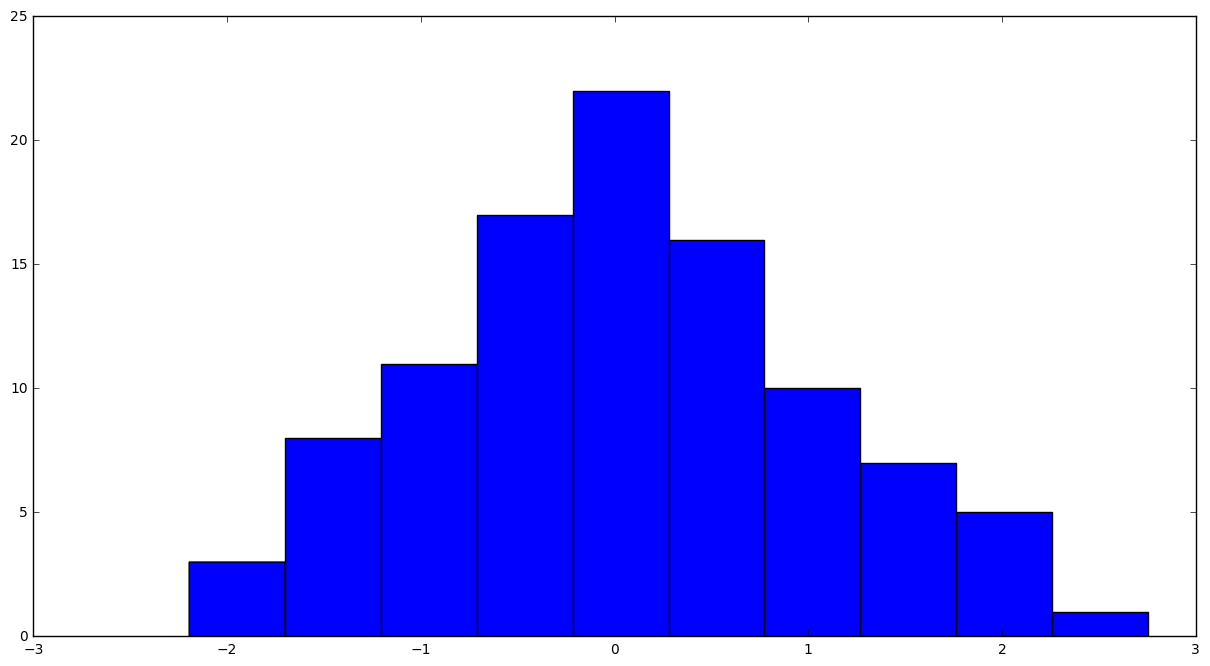

In [3]:
# СТРОИМ ГИСТОГРАММУ РАСПРЕДЕЛЕНИЯ ЗНАЧЕНИЙ ИЗ ОБЪЕКТА Series

plt.rcParams['figure.figsize']= (15,8)
plt.hist(pd_series)
plt.show()

### Многомерный объект (Data Frame)

In [4]:
# СОЗДАЕМ ТРИ СПИСКА ЗНАЧЕНИЙ, ОБЪЕДИНЯЕМ ИХ В СЛОВАРЬ И СОЗДАЕМ НА ЕГО ОСНОВЕ ОБЪЕКТ Data Frame

x = [i for i in range(51)]
y = [i ** 2 for i in x]
z = [i + np.random.normal(0,1) for i in x]
dict_xyz = {'x':x, 'y':y, 'z':z}
pd_df = pd.DataFrame(dict_xyz)
print(pd_df.head())

   x   y         z
0  0   0  0.274239
1  1   1  1.766375
2  2   4  4.228048
3  3   9  4.079734
4  4  16  3.893768


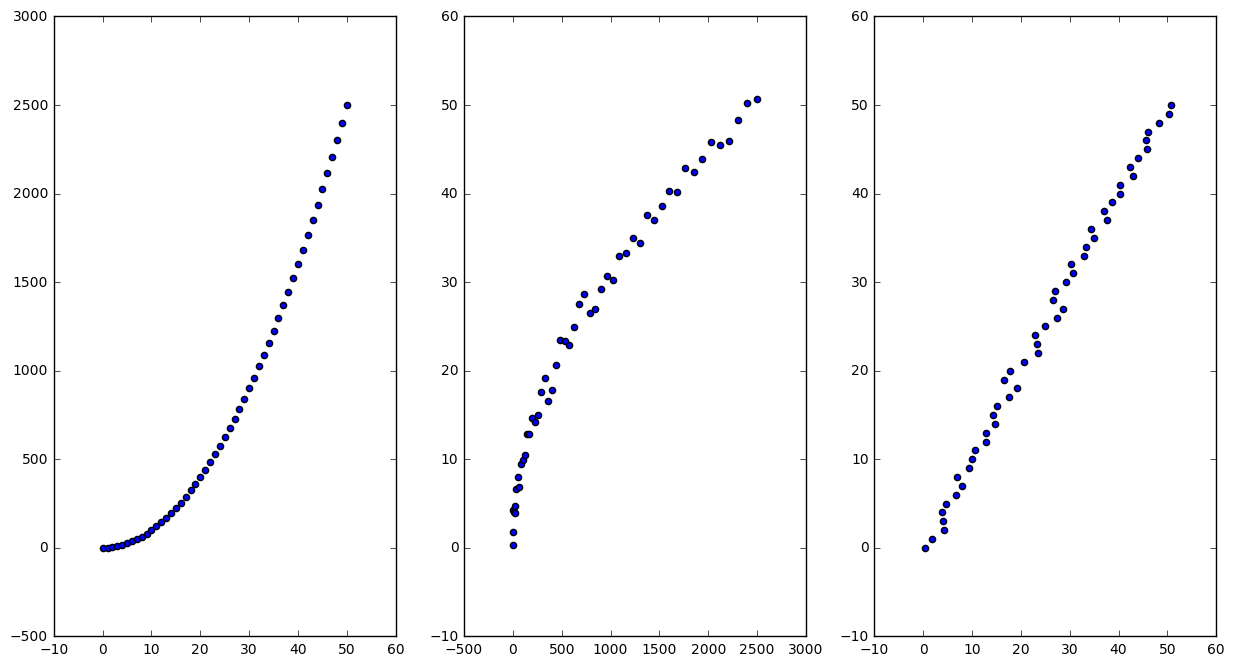

In [5]:
# СТРОИМ ГРАФИКИ РАССЕЯНИЯ ПОПАРНО ДЛЯ X, Y, Z

plt.subplot(1,3,1)
plt.scatter(x, y)
plt.subplot(1,3,2)
plt.scatter(y, z)
plt.subplot(1,3,3)
plt.scatter(z, x)
plt.show()

### 2.3. Считываем файл и создаем на его основе объект ***Data Frame***

In [6]:
# ДАННЫЕ ИЗ ФАЙЛА С РАСШИРЕНИЕМ .CSV (comma separated values - значения, разделенные запятой)
#  И СЧИТЫВАЕМ В ПЕРЕМЕННУЮ 'data' В КАЧЕСТВЕ ОБЪЕКТА DATA FRAME  

flats = pd.read_csv('flats_review.csv', sep=';', decimal=',', index_col='n')
print(flats.head())
flats.rename(columns={'price':'цена','s':'площадь','floor':'этаж',
                          'rooms':'комнаты','walls':'стены','district':'район'}, inplace=True)

   price     s  floor  rooms  walls  district
n                                            
1  10000  18.5      1      1      1         1
2  11000  57.1      1      3      0         1
3   9000  19.0      3      1      1         1
4   9000  36.5      9      1      1         4
5  14000  60.0      6      2      0         3


#### Этот набор данных содержит информацию о совокупности квартир по следующим признакам:
- цена, тыс.руб.
- жилая площадь, кв.м.
- этаж, номер (1-12)
- количество комнат, помещений (1-3)
- материал стен, вид (кирпичный - 0, панельный - 1)
- район города, номер (1-4)

In [7]:
# ВЫВОДИМ НА ЭКРАН ПЕРВЫЕ 3 СТРОКИ (ПО УМОЛЧАНИЮ ВЫВОДИТСЯ 5 СТРОК)

print(flats.head(3))

    цена  площадь  этаж  комнаты  стены  район
n                                             
1  10000     18.5     1        1      1      1
2  11000     57.1     1        3      0      1
3   9000     19.0     3        1      1      1


In [8]:
# ВЫВОДИМ НА ЭКРАН ПОСЛЕДНИЕ 7 СТРОК (ПО УМОЛЧАНИЮ ТАКЖЕ ВЫВОДИТСЯ 5 СТРОК)

print(flats.tail(7))

      цена  площадь  этаж  комнаты  стены  район
n                                               
127  18000     70.0     9        3      0      3
128  14000     44.0     4        2      0      4
129   9000     30.0     8        1      1      2
130  16000     50.0     5        2      1      3
131  10000     35.0     5        1      1      3
132   8000     16.0     1        1      1      1
133  11000     33.0     1        1      0      4


In [9]:
# ВЫВОДИМ НА ЭКРАН ПРОИЗВОЛЬНОЕ ЧИСЛО СТРОК С ПРОИЗВОЛЬНЫМИ НОМЕРАМИ

print(flats.take([10,15,21,23,42]))

     цена  площадь  этаж  комнаты  стены  район
n                                              
11   8000     16.0     5        1      1      2
16   6000     14.0     3        1      1      3
22  11000     22.0     7        1      1      2
24   9000     24.0     1        1      1      3
43  13000     43.0     5        2      0      4


In [10]:
# ВЫВОДИ НА ЭКРАН СЛУЧАЙНЫЕ 5 СТРОК (В ОБЩЕМ СЛУЧАЕ - ПРОИЗВОЛЬНОЕ ЧИСЛО СТРОК)

print(flats.sample(5))

      цена  площадь  этаж  комнаты  стены  район
n                                               
104  16000     60.0     8        2      1      3
53    8500     28.0     7        1      1      1
68   12000     43.0     7        1      0      4
51    7500     15.0     1        1      0      4
76   20000     66.0     6        3      0      4


In [11]:
# ЛЮБОЙ ОБЪЕКТ Data Frame ВКЛЮЧАЕТ ТРИ КОМПОНЕНТА: ИНДЕКСЫ, КОЛОНКИ, САМИ ДАННЫЕ
# ВЫЯСНЯЕМ ЗНАЧЕНИЯ ИНДЕКСОВ

flats.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            124, 125, 126, 127, 128, 129, 130, 131, 132, 133],
           dtype='int64', name='n', length=133)

In [12]:
# ... И НАЗВАНИЙ КОЛОНОК,

flats.columns

Index(['цена', 'площадь', 'этаж', 'комнаты', 'стены', 'район'], dtype='object')

In [13]:
# А ТАКЖЕ САМИ ДАННЫЕ (ВЫВЕДЕМ НА ЭКРАН ТОЛЬКО ПЕРВЫЕ 10 СТРОК)

flats.values[:10]

array([[  1.00000000e+04,   1.85000000e+01,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00],
       [  1.10000000e+04,   5.71000000e+01,   1.00000000e+00,
          3.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  9.00000000e+03,   1.90000000e+01,   3.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00],
       [  9.00000000e+03,   3.65000000e+01,   9.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   4.00000000e+00],
       [  1.40000000e+04,   6.00000000e+01,   6.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   3.00000000e+00],
       [  7.00000000e+03,   1.20000000e+01,   4.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   3.00000000e+00],
       [  1.30000000e+04,   6.80000000e+01,   4.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  6.50000000e+03,   2.60000000e+01,   2.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   4.00000000e+00],


In [14]:
# ОПРЕДЕЛЯЕМ ФОРМУ ОБЪЕКТА: 133 ЕДИНИЦЫ И 6 ПРИЗНАКОВ

flats.shape

(133, 6)

In [15]:
# ОПРЕДЕЛЯЕМ РАЗМЕР ОБЪЕКТА (ЧИСЛО ЗНАЧЕНИЙ): 133 х 6 

flats.size  

798

In [16]:
# ПОЛУЧАЕМ ОБЩУЮ ИНФОРМАЦИЮ ОБ ОБЪЕКТЕ 

flats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 1 to 133
Data columns (total 6 columns):
цена       133 non-null int64
площадь    133 non-null float64
этаж       133 non-null int64
комнаты    133 non-null int64
стены      133 non-null int64
район      133 non-null int64
dtypes: float64(1), int64(5)
memory usage: 7.3 KB


# 3. Выполнение операций с содержимым массива 

### 3.1. Получение поднаборов данных из объекта (так называемых "слайсов" или "срезов")

In [17]:
# ВЫДЕЛЯЕМ ИЗ НАБОРА ДАННЫХ ПОДНАБОР, СОСТОЯЩИЙ ИСКЛЮЧИТЕЛЬНО ИЗ РЕЗУЛЬТАТИВНОГО ПОКАЗАТЕЛЯ ('price')

# ЗДЕСЬ ПОЛУЧАЕМ ОБЪЕКТ Series (ОБРАТИМ ВНИМАНИЕ НА КОЛИЧЕСТВО СКОБОК - ОДНА ПАРА)
flats_price = flats['цена']
print(type(flats_price))
print(flats_price.shape)

# ЗДЕСЬ ПОЛУЧАЕМ ОБЪЕКТ Data Frame (ОБРАТИМ ВНИМАНИЕ НА КОЛИЧЕСТВО СКОБОК -  ДВЕ ПАРЫ)
flats_price = flats[['цена']]
print(type(flats_price))
print(flats_price.shape)

<class 'pandas.core.series.Series'>
(133,)
<class 'pandas.core.frame.DataFrame'>
(133, 1)


In [18]:
# СРЕЗ ПО СТОЛБЦАМ - ВЫДЕЛЯЕМ ПОДНАБОР ИЗ КОЛИЧЕСТВЕННЫХ ФАКТОРНЫХ ПРИЗНАКОВ ('s', 'floor', 'rooms')

flats_numerical_x = flats[['площадь', 'этаж', 'комнаты']]
print(flats_numerical_x.head(), '\n') 
flats_numerical_x.info()

   площадь  этаж  комнаты
n                        
1     18.5     1        1
2     57.1     1        3
3     19.0     3        1
4     36.5     9        1
5     60.0     6        2 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 1 to 133
Data columns (total 3 columns):
площадь    133 non-null float64
этаж       133 non-null int64
комнаты    133 non-null int64
dtypes: float64(1), int64(2)
memory usage: 4.2 KB


In [19]:
# ЕЩЕ РАЗ СЧИТЫВАЕМ ДАННЫЕ, НО УЖЕ НЕ УКАЗЫВАЕМ ИНДЕКС - ОБРАТИМ ВНИМАНИЕ НА РАЗНИЦУ МЕЖДУ 
# НУМЕРАЦИЕЙ ОБЪЕТА Data Frame (ИДЕТ С НУЛЯ) И НУМЕРАЦИЕЙ ОБЪЕКТОВ В ФАЙЛЕ (n ИДЕТ С ЕДИНИЦЫ) 

flats_default_index = pd.read_csv('flats_review.csv', sep=';', decimal=',')
flats_default_index.rename(columns={'price':'цена','s':'площадь','floor':'этаж',
                          'rooms':'комнаты','walls':'стены','district':'район'}, inplace=True)
print(flats_default_index.head(3))

   n   цена  площадь  этаж  комнаты  стены  район
0  1  10000     18.5     1        1      1      1
1  2  11000     57.1     1        3      0      1
2  3   9000     19.0     3        1      1      1


In [20]:
# СРЕЗ ПО СТРОКАМ - ВЫДЕЛЯЕМ ПОДНАБОР ЕДИНИЦ, НАХОДЯЩИХСЯ В ДИАПАЗОНЕ СТРОК (5:10)
flats_row_from_6_to_10 = flats.iloc[5:10,:]
print(flats_row_from_6_to_10)

     цена  площадь  этаж  комнаты  стены  район
n                                              
6    7000     12.0     4        1      1      3
7   13000     68.0     4        2      0      1
8    6500     26.0     2        1      0      4
9    7000     12.0     3        1      1      4
10  13000     43.0     5        2      1      3


In [21]:
# СРЕЗ ПО СТРОКАМ - ВЫДЕЛЯЕМ ПОДНАБОР ЕДИНИЦ, НАХОДЯЩИХСЯ В ДИАПАЗОНЕ СТРОК (5:10)
flats_row_from_5_to_9 = flats_default_index.iloc[5:10,:]
print(flats_row_from_5_to_9)

    n   цена  площадь  этаж  комнаты  стены  район
5   6   7000     12.0     4        1      1      3
6   7  13000     68.0     4        2      0      1
7   8   6500     26.0     2        1      0      4
8   9   7000     12.0     3        1      1      4
9  10  13000     43.0     5        2      1      3


In [22]:
# ПОЛУЧАЕМ СРЕЗ ПУТЕМ ОБРАЩЕНИЯ К МАССИВУ ПО КООРДИНАТАМ: БЕРЕМ ПЕРВЫЕ ПЯТЬ СТРОК 
# (С 0-Й ПО 5-Ю НЕВКЛЮЧИТЕЛЬНО) И СТОЛБЦЫ (С 1-ГО ПО 4-Й НЕВКЛЮЧИТЕЛЬНО) 

print(flats.iloc[0:6,1:4])

   площадь  этаж  комнаты
n                        
1     18.5     1        1
2     57.1     1        3
3     19.0     3        1
4     36.5     9        1
5     60.0     6        2
6     12.0     4        1


In [23]:
# ПОЛУЧАЕМ ТОТ ЖЕ СРЕЗ МАССИВА, НО УЖЕ ОБРАЩАЯСЬ К НЕМУ ПО ИМЕНАМ (ПО СТРОКАМ - ЧИСЛОВОЙ ДИАПАЗОН 1:5 
# ПРЕДСТАВЛЯЕТ СОБОЙ ПРИСВОЕННЫЕ СТРОКАМ ЗНАЧЕНИЯ ИНДЕКСОВ)

print(flats.loc[1:6,['площадь','этаж','комнаты']])

   площадь  этаж  комнаты
n                        
1     18.5     1        1
2     57.1     1        3
3     19.0     3        1
4     36.5     9        1
5     60.0     6        2
6     12.0     4        1


In [24]:
# СРЕЗ ПО РЕЗУЛЬТАТАМ СОРТИРОВКИ - ПОЛУЧАЕМ ПОДНАБОР ИЗ 10 САМЫХ ДОРОГИХ КВАРТИР В МАССИВЕ, ДЛЯ ЭТОГО:

# ПРОИЗВОДИМ "ПРЯМУЮ" СОРТИРОВКУ МАССИВА ПО ПОКАЗАТЕЛЮ ЦЕНЫ ('price') 
flats_sort_price = flats.sort_values(by='цена', ascending='True')

# ОТБИРАЕМ ПОСЛЕДНИЕ 10 ЕДИНИЦ УПОРЯДОЧЕННОГО МАССИВА
flat_price_top10 = flats_sort_price.iloc[-10:,:]
print('Самые дорогие квартиры в наборе данных: \n\n', flat_price_top10)

Самые дорогие квартиры в наборе данных: 

       цена  площадь  этаж  комнаты  стены  район
n                                               
29   19000     50.0     4        1      1      2
34   19000     54.0     1        2      1      2
111  20000     55.0     1        2      1      3
109  20000     65.0     8        2      1      3
28   20000     64.0     3        3      0      1
98   20000     50.0     4        2      1      2
92   20000     70.0    10        3      0      3
76   20000     66.0     6        3      0      4
18   20000     69.0     2        2      1      3
96   20000     54.0     7        2      1      2


In [25]:
# ДЕЛАЕМ ЛОГИЧЕСКИЙ СРЕЗ, ДЕЛЯ МАССИВ НА ДВЕ ЧАСТИ ПО ПРИЗНАКУ МАТЕРИАЛА СТЕН КВАРТИР:
# КИРПИЧ ('walls'= 0) И ПАНЕЛЬ ('walls'=1). ПОСЛЕ ЧЕГО СЧИТАЕМ СРЕДНЮЮ ЦЕНУ ПО ПОЛУЧЕННЫМ ГРУППАМ

flats_brick_walls = flats[flats['стены'] == 0]
print('\nСредняя цена квартир в кирпичном доме: ', round(flats_brick_walls['цена'].mean(), 1), 'т.р.\n')
flats_panel_walls = flats[flats['стены'] == 1]
print('Медианная цена квартир в панельном доме: ', round(flats_panel_walls['цена'].median(), 1), 'т.р.\n')


Средняя цена квартир в кирпичном доме:  12400.0 т.р.

Медианная цена квартир в панельном доме:  11500.0 т.р.



In [26]:
# ДЕЛАЕМ СРЕЗ ПО ДВУМ УСЛОВИЯМ: МАТЕРИАЛУ СТЕН И ВЫСОТНОСТИ РАСПОЛОЖЕНИЯ (ДО 7 ЭТАЖА ИЛИ ВЫШЕ)
# СНОВА СЧИТАЕМ СРЕДНЮЮ ЦЕНУ ПО ПОЛУЧЕННЫМ ГРУППАМ

flats_brick_walls_low_floor = flats[(flats['стены'] == 0) & (flats['этаж'] < 8)]
print('\nСтандартное отклонение цен на квартиры в кирпичных домах на этажах до 7-го включительно:', 
      round(flats_brick_walls_low_floor['цена'].std(), 1), 'т.р.\n')
flats_panel_walls_high_floor = flats[(flats['стены'] == 1) & (flats['этаж'] >= 8)]
print('Дисперсия цен на квартиры в панельных домах на этажах не ниже 8-го: ', 
round(flats_panel_walls_high_floor['цена'].var(), 1))


Стандартное отклонение цен на квартиры в кирпичных домах на этажах до 7-го включительно: 3031.0 т.р.

Дисперсия цен на квартиры в панельных домах на этажах не ниже 8-го:  12400000.0


In [27]:
# ДЕЛАЕМ СРЕЗ ПО ТРЕМ УСЛОВИЯМ: МАТЕРИАЛУ СТЕН, ВЫСОТНОСТИ РАСПОЛОЖЕНИЯ И НОМЕРУ РАЙОНА
# СНОВА СЧИТАЕМ СРЕДНЮЮ ЦЕНУ ПО ПОЛУЧЕННЫМ ГРУППАМ

flats_brick_walls_low_floor_not_1_district = flats[(flats['стены'] == 0) & (flats['этаж'] < 8) & 
                                    (flats['район'] != 2)]
print('\nМиниальная цена квартир в кирпичных домах на этажах до 7-го включ-но, в любом из районов, кроме 2-го:', 
      round(flats_brick_walls_low_floor_not_1_district['цена'].min(), 1), 'т.р.\n')
flats_panel_walls_high_floor = flats[(flats['стены'] == 1) & (flats['этаж'] >= 8) &
                                     ((flats['район'] == 1)|(flats['район'] == 4))]
print('Максимальная цена квартир в панельных домах на этажах ниже 8-го, в 1-м или 4-м районах: ', 
round(flats_panel_walls_high_floor['цена'].max(), 1),  'т.р.\n')


Миниальная цена квартир в кирпичных домах на этажах до 7-го включ-но, в любом из районов, кроме 2-го: 6500 т.р.

Максимальная цена квартир в панельных домах на этажах ниже 8-го, в 1-м или 4-м районах:  11000 т.р.



### 3.2. Операции со столбцами: переименование, добавление, удаление

In [28]:
# ПЕРЕИМЕНОВЫВАЕМ СТОЛБЦЫ НАБОРА ДАННЫХ - ИЗМЕНЕНИЯ СОХРАНЯЮТСЯ ТОЛЬКО В НОВОМ МАССИВЕ!!!

flats = pd.read_csv('flats_review.csv', sep=';', decimal=',', index_col='n')
flats_rus_names = flats.rename(columns={'price':'цена','s':'площадь','floor':'этаж',
                                        'rooms':'комнаты','walls':'стены','district':'район'})
print(flats_rus_names.head())

    цена  площадь  этаж  комнаты  стены  район
n                                             
1  10000     18.5     1        1      1      1
2  11000     57.1     1        3      0      1
3   9000     19.0     3        1      1      1
4   9000     36.5     9        1      1      4
5  14000     60.0     6        2      0      3


In [29]:
# ДОБАВЛЯЕМ НОВЫЙ СТОЛБЕЦ ПУТЕМ СОЗДАНИЯ НОВОЙ ПЕРЕМЕННОЙ 'цена за метр' 
# КАК РЕЗУЛЬТАТА ОТНОШЕНИЯ ПЕРЕМЕННЫХ 'цена' И 'площадь'

flats_rus_names.insert(2, 'цена за метр', round((flats['price'] / flats['s']), 3))
flats_rus_names.head()

,цена,площадь,цена за метр,этаж,комнаты,стены,район
n,,,,,,,
1,10000,18.5,540.541,1,1,1,1
2,11000,57.1,192.644,1,3,0,1
3,9000,19.0,473.684,3,1,1,1
4,9000,36.5,246.575,9,1,1,4
5,14000,60.0,233.333,6,2,0,3


In [30]:
# ПРОСТО РАСШИРЯЕМ НАБОР ДАННЫХ ПУТЕМ ОБЪЯВЛЕНИЯ НОВОГО СТОЛБЦА И ЗАПОЛНЕНИЯ ЕГО 
# ЗНАЧЕНИЕМ None (КОТОРОЕ ВПОСЛЕДСТВИИ МОЖНО БУДЕТ ЗАМЕНИТЬ ЧЕМ-НИБУДЬ ПОЛЕЗНЫМ)

flats_rus_names.loc[:,'новый показатель'] = None
flats_rus_names.head()

,цена,площадь,цена за метр,этаж,комнаты,стены,район,новый показатель
n,,,,,,,,
1,10000,18.5,540.541,1,1,1,1,None
2,11000,57.1,192.644,1,3,0,1,None
3,9000,19.0,473.684,3,1,1,1,None
4,9000,36.5,246.575,9,1,1,4,None
5,14000,60.0,233.333,6,2,0,3,None


In [31]:
# ДОБАВЛЕНИЕ ПУТЕМ КОНКАТЕНАЦИИ (СКЛЕИВАНИЯ) МНОГОМЕРНОГО ОБЪЕКТА (Data Frame) С 
# ОДНОМЕРНЫМ ОБЪЕКТОМ (Series)

# ДЛЯ ЭТОГО СОЗДАЕМ ОДНОМЕРНЫЙ ОБЪЕКТ
price_millions = pd.Series(flats['price'] / 1000, name='цена в миллионах')
price_millions.head()

# И ПРИКЛЕИВАЕМ ЕГО К МНОГОМЕРНОМУ ОБЪЕКТУ
flats_rus_names_concatenated = pd.concat([flats_rus_names, price_millions], axis=1)
flats_rus_names_concatenated.head()

,цена,площадь,цена за метр,этаж,комнаты,стены,район,новый показатель,цена в миллионах
n,,,,,,,,,
1,10000,18.5,540.541,1,1,1,1,None,10.0
2,11000,57.1,192.644,1,3,0,1,None,11.0
3,9000,19.0,473.684,3,1,1,1,None,9.0
4,9000,36.5,246.575,9,1,1,4,None,9.0
5,14000,60.0,233.333,6,2,0,3,None,14.0


In [32]:
# УДАЛЯЕМ СТОЛБЕЦ 'новый показатель' И РЕЗУЛЬТАТ ЗАПИСЫВАЕМ В НОВУЮ ПЕРЕМЕННУЮ - 
# ТАК КАК ЕСЛИ ЭТОГО НЕ СДЕЛАТЬ, ТО ИЗМЕНЕНИЕ НЕ СОХРАНИТСЯ!

flats_rus_names_without_new_indicator = flats_rus_names.drop(['новый показатель'], axis=1)
flats_rus_names_without_new_indicator.head()

,цена,площадь,цена за метр,этаж,комнаты,стены,район
n,,,,,,,
1,10000,18.5,540.541,1,1,1,1
2,11000,57.1,192.644,1,3,0,1
3,9000,19.0,473.684,3,1,1,1
4,9000,36.5,246.575,9,1,1,4
5,14000,60.0,233.333,6,2,0,3


### 3.3. Операции со строками: присоединение, конкатенация, удаление

In [33]:
# СОЗДАЕМ НАБОР 10 САМЫХ ДЕШЕВЫХ КВАРТИР
flat_price_antitop10 = flats_sort_price.iloc[:10,:]

# ... И ПРИСОЕДИНЯЕМ К НЕМУ НАБОР 10 САМЫХ ДОРОГИХ КВАРТИР
flat_price_antitop10_and_top10_append = flat_price_antitop10.append(flat_price_top10)
print(flat_price_antitop10_and_top10_append)

      цена  площадь  этаж  комнаты  стены  район
n                                               
79    6000     12.0     1        1      0      2
78    6000     20.0     2        1      1      2
16    6000     14.0     3        1      1      3
54    6000     12.0     3        1      1      3
25    6500     21.0     2        1      1      1
8     6500     26.0     2        1      0      4
21    7000     15.0     1        1      0      3
106   7000     19.0     1        1      1      3
20    7000     30.0     1        2      1      4
120   7000     13.0     3        1      1      1
29   19000     50.0     4        1      1      2
34   19000     54.0     1        2      1      2
111  20000     55.0     1        2      1      3
109  20000     65.0     8        2      1      3
28   20000     64.0     3        3      0      1
98   20000     50.0     4        2      1      2
92   20000     70.0    10        3      0      3
76   20000     66.0     6        3      0      4
18   20000     69.0 

In [34]:
# СКЛЕИВАЕМ НАБОРЫ САМЫХ ДЕШЕВЫХ И САМЫХ ДОРОГИХ КВАРТИР ПО СТРОКАМ И ПОЛУЧАЕМ АНАЛОГИЧНЫЙ РЕЗУЛЬТАТ

flat_price_antitop10_and_top10_concate = pd.concat([flat_price_antitop10, flat_price_top10], axis=0)
print(flat_price_antitop10_and_top10_append == flat_price_antitop10_and_top10_concate)

     цена площадь  этаж комнаты стены район
n                                          
79   True    True  True    True  True  True
78   True    True  True    True  True  True
16   True    True  True    True  True  True
54   True    True  True    True  True  True
25   True    True  True    True  True  True
8    True    True  True    True  True  True
21   True    True  True    True  True  True
106  True    True  True    True  True  True
20   True    True  True    True  True  True
120  True    True  True    True  True  True
29   True    True  True    True  True  True
34   True    True  True    True  True  True
111  True    True  True    True  True  True
109  True    True  True    True  True  True
28   True    True  True    True  True  True
98   True    True  True    True  True  True
92   True    True  True    True  True  True
76   True    True  True    True  True  True
18   True    True  True    True  True  True
96   True    True  True    True  True  True


In [35]:
# УДАЛЕНИЕ СТРОК ОСУЩЕСТВЛЯЕТСЯ ЛИБО СОЗДАНИЕМ СРЕЗА ИЗ ИСХОДНОГО МАССИВА,

in_append = flat_price_antitop10_and_top10_append.index[:5].values
print('Номера оставляемых единиц:', end=' ')
[print(i, end=' ') for i in in_append]
flats_price_top5_append = flat_price_antitop10_and_top10_append.loc[in_append]
print('\n\n', flats_price_top5_append, '\n')

# ... ЛИБО АНАЛОГИЧНО СЛУЧАЮ СО СТОЛБЦАМИ

out_concate = flat_price_antitop10_and_top10_append.index[5:].values
print('Номера удаляемых единиц:', end=' ')
[print(i, end=' ') for i in out_concate]
flats_price_top5_concate = flat_price_antitop10_and_top10_append.drop(out_concate)
print('\n\n', flats_price_top5_concate, '\n')

Номера оставляемых единиц: 79 78 16 54 25 

     цена  площадь  этаж  комнаты  стены  район
n                                             
79  6000     12.0     1        1      0      2
78  6000     20.0     2        1      1      2
16  6000     14.0     3        1      1      3
54  6000     12.0     3        1      1      3
25  6500     21.0     2        1      1      1 

Номера удаляемых единиц: 8 21 106 20 120 29 34 111 109 28 98 92 76 18 96 

     цена  площадь  этаж  комнаты  стены  район
n                                             
79  6000     12.0     1        1      0      2
78  6000     20.0     2        1      1      2
16  6000     14.0     3        1      1      3
54  6000     12.0     3        1      1      3
25  6500     21.0     2        1      1      1 



# 4. Применение численных и статистических методов

### 4.1. Численные методы

In [36]:
# СОЗДАЕМ НОВЫЙ ОБЪЕКТ DATA FRAME НА ОСНОВЕ НОРМАЛЬНО РАСПРЕДЕЛЕННОЙ СЛУЧАЙНОЙ ВЫБОРКИ

np.random.seed(42)
df = pd.DataFrame(np.random.randn(30, 4), columns=['A','B','C','D'])
df.head(3)

,A,B,C,D
0,0.496714,-0.138264,0.647689,1.523030
1,-0.234153,-0.234137,1.579213,0.767435
2,-0.469474,0.542560,-0.463418,-0.465730


In [37]:
# ПРИБАВЛЯЕМ 5 К КАЖДОМУ ЭЛЕМЕНТУ МАССИВА

df_plus_5 = df + 5
df_plus_5.head(3)

,A,B,C,D
0,5.496714,4.861736,5.647689,6.523030
1,4.765847,4.765863,6.579213,5.767435
2,4.530526,5.542560,4.536582,4.534270


In [38]:
# УМНОЖАЕМ НА 2 КАЖДЫЙ ЭЛЕМЕНТ МАССИВА

df_product_2 = df * 2
df_product_2.head(3)

,A,B,C,D
0,0.993428,-0.276529,1.295377,3.046060
1,-0.468307,-0.468274,3.158426,1.534869
2,-0.938949,1.085120,-0.926835,-0.931460


In [39]:
# ВЫЧИТАЕМ НАЧАЛЬНУЮ СТРОКУ МАССИВА ИЗ КАЖДОЙ СТРОКИ МАССИВА

str_0 = df.iloc[0]
df_without_startstring = df - str_0
df_without_startstring.head(3)

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,-0.730868,-0.095873,0.931524,-0.755595
2,-0.966189,0.680824,-1.111106,-1.988760


In [40]:
# ВЫЧИТАЕМ НАЧАЛЬНЫЙ СТОЛБЕЦ МАССИВА ИЗ КАЖДОГО СТОЛБЦА МАССИВА 

column_A =  df['A']
df_minus_column_A = df.sub(column_A, axis=0)
df_minus_column_A.head(3)

,A,B,C,D
0,0.0,-0.634978,0.150974,1.026316
1,0.0,0.000016,1.813366,1.001588
2,0.0,1.012034,0.006057,0.003745


### 4.2. Статистические методы (на основе набора данных о квартирах)

In [41]:
# СОЗДАДИМ НОВЫЙ ОБЪЕКТ ДЛЯ ПРОВЕДЕНИЯ КРАТКОГО СТАТИСТИЧЕСКОГО АНАЛИЗА

flats_stat = pd.read_csv('flats_review.csv', sep=';', decimal=',', index_col='n')
flats_stat.rename(columns={'price':'цена','s':'площадь','floor':'этаж',
                          'rooms':'комнаты','walls':'стены','district':'район'}, inplace=True)

In [42]:
# ВЫВЕДЕМ СПИСОК УНИКАЛЬНЫХ ЗНАЧЕНИЙ, ПРИНИМАЕМЫХ ПЕРЕМЕННЫМИ В НАБОРЕ ДАННЫХ

print('Уникальные значения переменной \'цена\', т.р.:\n', flats_stat['цена'].unique(), '\n')
print('Уникальные значения переменной \'площадь\', кв.м.:\n', flats_stat['площадь'].unique(), '\n')
print('Уникальные значения переменной \'этаж\':', flats_stat['этаж'].unique(), '\n')
print('Уникальные значения переменной \'стены\':', flats_stat['стены'].unique(), '\n')
print('Уникальные значения переменной \'район\':', flats_stat['район'].unique(), '\n')

Уникальные значения переменной 'цена', т.р.:
 [10000 11000  9000 14000  7000 13000  6500  8000 12000 10500  7500  6000
 15000 20000 19000 16000  8500 17000  9500 18000 17500] 

Уникальные значения переменной 'площадь', кв.м.:
 [ 18.5  57.1  19.   36.5  60.   12.   68.   26.   43.   16.   30.   31.
  20.   11.   14.   48.   69.   40.   15.   22.   24.   21.   44.   38.
  64.   50.   29.   54.   17.   65.   36.   28.   34.   35.   33.   42.
  66.   45.   18.   70.   32.   55.   13.   39. ] 

Уникальные значения переменной 'этаж': [ 1  3  9  6  4  2  5  8  7 12 10] 

Уникальные значения переменной 'стены': [1 0] 

Уникальные значения переменной 'район': [1 4 3 2] 



In [43]:
# РАССЧИТАЕМ СРЕДНИЕ ЗНАЧЕНИЯ ПО ВСЕМ ПЕРЕМЕННЫМ НАБОРА ДАННЫХ

flats_stat.mean()

цена       11962.406015
площадь       36.617293
этаж           4.210526
комнаты        1.368421
стены          0.661654
район          2.390977
dtype: float64

In [44]:
# ВЫЯСНИМ МИНИМАЛЬНОЕ И МАКСИМАЛЬНОЕ ЗНАЧЕНИЯ ПО ПЕРЕМЕННОЙ 'price'

print('Цены на квартиры: минимальная - {0:.1f} т.р., максимальная - {1:.1f} т.р.'.
      format(flats_stat['цена'].min(), flats_stat['цена'].max()))

Цены на квартиры: минимальная - 6000.0 т.р., максимальная - 20000.0 т.р.


In [45]:
# ТОР5 САМЫХ МАЛЕНЬКИХ И БОЛЬШИХ КВАРТИР

print('Пять квартир с самой маленькой плодащью, кв.м.:')
print(flats_stat['площадь'].nsmallest(5), '\n')
print('Пять квартир с самой большой плодащью, кв.м.:')
print(flats_stat['площадь'].nlargest(5))

Пять квартир с самой маленькой плодащью, кв.м.:
n
15    11.0
6     12.0
9     12.0
54    12.0
79    12.0
Name: площадь, dtype: float64 

Пять квартир с самой большой плодащью, кв.м.:
n
92     70.0
100    70.0
127    70.0
18     69.0
7      68.0
Name: площадь, dtype: float64


In [46]:
# РАССЧИТАЕМ МЕДИАННОЕ ЗНАЧЕНИЕ ПЛОЩАДИ КВАРТИР

print('Медианная плодащь квартир составляет {:.1f} кв.м.'.format(flats_stat['площадь'].median()))

Медианная плодащь квартир составляет 36.0 кв.м.


In [47]:
# РАССЧИТАЕМ КВАНТИЛИ (1-процентный, 5-процентный и т.д.)

flats_stat[['цена', 'площадь']].quantile([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,цена,площадь
0.01,6000.0,12.0
0.05,7000.0,14.0
0.10,7500.0,16.2
0.25,9000.0,22.0
0.50,12000.0,36.0
0.75,14000.0,45.0
0.90,17900.0,60.0
0.95,20000.0,65.0
0.99,20000.0,70.0


In [48]:
# РАССЧИТЫВАЕМ КОЭФФИЦИЕНТ ВАРИАЦИИ ДЛЯ ОДНОГО КОНКРЕТНОГО ПОКАЗАТЕЛЯ

koef_var_price = flats_stat['цена'].std() * 100 / flats_stat['цена'].mean()
print('Значение коэффициента вариации для переменной \'цена\' равно {:.1f} %'.format(koef_var_price))

Значение коэффициента вариации для переменной 'цена' равно 31.1 %


In [49]:
# ЛИБО МОЖНО ОПРЕДЕЛИТЬ ФУНКЦИЮ И ВЫЗЫВАТЬ ЕЕ ДЛЯ РАСЧЕТА КОЭФФИЦИЕНТА ВАРИАЦИИ
# ДЛЯ ЛЮБОГО КОЛИЧЕСТВА ПЕРЕМЕННЫХ

def koef_var(x):
    print('Коэффиенты вариации для следующих показателей:')
    return x.std() * 100 / x.mean()
        
print(koef_var(flats_stat), '\n')
print(koef_var(df))

Коэффиенты вариации для следующих показателей:
цена       31.077356
площадь    42.674053
этаж       63.650955
комнаты    44.499790
стены      71.780053
район      46.855266
dtype: float64 

Коэффиенты вариации для следующих показателей:
A    -400.955530
B    -802.278274
C   -1212.836648
D    1944.885720
dtype: float64


In [50]:
# ВЫЗОВЕМ ЦЕЛЫЙ СПИСОК ОПИСАТЕЛЬНЫХ СТАТИСТИК ДЛЯ ПОКАЗАТЕЛЕЙ ИЗ НАБОРА ДАННЫХ 

flats_stat.describe().round(3)

,цена,площадь,этаж,комнаты,стены,район
count,133.000,133.000,133.000,133.000,133.000,133.000
mean,11962.406,36.617,4.211,1.368,0.662,2.391
std,3717.599,15.626,2.680,0.609,0.475,1.120
min,6000.000,11.000,1.000,1.000,0.000,1.000
25%,9000.000,22.000,2.000,1.000,0.000,1.000
50%,12000.000,36.000,4.000,1.000,1.000,2.000
75%,14000.000,45.000,6.000,2.000,1.000,3.000
max,20000.000,70.000,12.000,3.000,1.000,4.000


In [51]:
# ПОСМОТРИМ НА ТИП ДАННЫХ В ПЕРЕМЕННЫХ 'стены' И 'район'

flats_stat[['стены', 'район']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 1 to 133
Data columns (total 2 columns):
стены    133 non-null int64
район    133 non-null int64
dtypes: int64(2)
memory usage: 3.1 KB


In [52]:
# ПРЕОБРАЗУЕМ ПЕРЕМЕННЫЕ 'стены' И 'район' ИЗ КОЛИЧЕСТВЕННЫХ В КАТЕГОРИАЛЬНЫЕ ПУТЕМ ВВЕДЕНИЯ
# НОВЫХ ПЕРЕМЕННЫХ 

flats_stat['тип_стен'] = flats_stat['стены'].astype('category')
flats_stat['номер_района'] = flats_stat['район'].astype('category')

In [53]:
# СНОВА ПОЛУЧАЕМ ОБЩУЮ ИНФОРМАЦИЮ ОБ ОБЪЕКТЕ И ВИДИМ, ЧТО ПОЯВИЛИСЬ НОВЫЕ ПЕРЕМЕННЫЕ

flats_stat.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 1 to 133
Data columns (total 8 columns):
цена            133 non-null int64
площадь         133 non-null float64
этаж            133 non-null int64
комнаты         133 non-null int64
стены           133 non-null int64
район           133 non-null int64
тип_стен        133 non-null category
номер_района    133 non-null category
dtypes: category(2), float64(1), int64(5)
memory usage: 7.6 KB


In [54]:
# УДАЛЯЕМ ПЕРЕМЕННЫЕ 'walls' И 'district'

flats_stat.drop(['стены', 'район'], axis=1, inplace=True)

In [55]:
# СМОТРИМ НА ПЕРВЫЕ 5 СТРОК ИЗМЕННЕННОГО НАБОРА ДАННЫХ

flats_stat.head()

,цена,площадь,этаж,комнаты,тип_стен,номер_района
n,,,,,,
1,10000,18.5,1,1,1,1
2,11000,57.1,1,3,0,1
3,9000,19.0,3,1,1,1
4,9000,36.5,9,1,1,4
5,14000,60.0,6,2,0,3


In [56]:
# СНОВА ВЫЗЫВАЕМ ОПИСАТЕЛЬНЫЕ СТАТИСТИКИ

print(flats_stat.describe().round(3), '\n')
print(flats_stat[['тип_стен', 'номер_района']].describe())

            цена  площадь     этаж  комнаты
count    133.000  133.000  133.000  133.000
mean   11962.406   36.617    4.211    1.368
std     3717.599   15.626    2.680    0.609
min     6000.000   11.000    1.000    1.000
25%     9000.000   22.000    2.000    1.000
50%    12000.000   36.000    4.000    1.000
75%    14000.000   45.000    6.000    2.000
max    20000.000   70.000   12.000    3.000 

        тип_стен  номер_района
count        133           133
unique         2             4
top            1             1
freq          88            39


In [57]:
# СТРОИМ ДИСКРЕТНЫЕ РЯДЫ РАСПРЕДЕЛЕНИЯ ПО КАТЕГОРИАЛЬНЫМ ПЕРЕМЕННЫМ

print('Ряд распределения по переменной \'тип_стен\':')
print(flats_stat['тип_стен'].value_counts(), '\n')
print('Ряд распределения по переменной \'номер_района\':')
print(flats_stat['номер_района'].value_counts().sort_index(), '\n')

Ряд распределения по переменной 'тип_стен':
1    88
0    45
Name: тип_стен, dtype: int64 

Ряд распределения по переменной 'номер_района':
1    39
2    31
3    35
4    28
Name: номер_района, dtype: int64 



In [58]:
# ВПРОЧЕМ ДЛЯ ПОСТРОЕНИЯ ДИСКРЕТНОГО РЯДА РАСПРЕДЕЛЕНИЯ ПЕРЕМЕННОЙ НЕОБЯЗЯТЕЛНО БЫТЬ КАТЕГОРИАЛЬНОЙ

print('Ранжированнный ряд распределения квартир по номерам этажей:\n')
print(flats_stat['этаж'].value_counts().sort_index())

Ранжированнный ряд распределения квартир по номерам этажей:

1     21
2     17
3     28
4     17
5     15
6      7
7     10
8      9
9      4
10     1
12     4
Name: этаж, dtype: int64


In [59]:
# ПОСТРОИМ РАВНОИНТЕРВАЛЬНЫЙ РАНЖИРОВАННЫЙ ВАРИАЦИОННЫЙ РЯД РАСПРЕДЕЛЕНИЯ ПО ПЕРЕМЕННОЙ 'price'

# ДЛЯ ЭТОГО ОПРЕДЕЛИМ ЧИСЛО ГРУПП (ПО ФОРМУЛЕ СТЕРДЖЕССА)
groups = int(1 + 3.322 * np.log10(len(flats_stat['цена'])))
print('Число групп в ряду распределения будет равно %d' %groups)

Число групп в ряду распределения будет равно 8


In [60]:
# ОПРЕДЕЛЯЕМ ГРАНИЦЫ ИНТЕРВАЛОВ ГРУПП РЯДА РАСПРЕДЕЛЕНИЯ
# РАСПРЕДЕЛЯЕМ ЕДИНИЦЫ ПО ГРУППАМ, СЧИТАЕМ ЧАСТОТЫ И ЧАСТОСТИ (В ДОЛЯХ)

avto_bins = pd.cut(flats_stat['цена'].values, groups)
print(avto_bins.describe())

                counts     freqs
categories                      
(5986, 7750]        18  0.135338
(7750, 9500]        19  0.142857
(9500, 11250]       26  0.195489
(11250, 13000]      32  0.240602
(13000, 14750]       8  0.060150
(14750, 16500]      14  0.105263
(16500, 18250]       5  0.037594
(18250, 20000]      11  0.082707


In [61]:
# ТЕПЕРЬ ЗАДАEМ СВОИ ГРАНИЦЫ И ПОЛУЧАЕМ СЛЕДУЮЩИЙ РЯД РАСПРЕДЕЛЕНИЯ

ranges = [0, 5000, 10000, 15000, 20000]
custom_bins = pd.cut(flats_stat['цена'].values, ranges)
print(custom_bins.describe())

                counts     freqs
categories                      
(0, 5000]            0  0.000000
(5000, 10000]       49  0.368421
(10000, 15000]      62  0.466165
(15000, 20000]      22  0.165414


### 4.3. Проверка статистических гипотез (используем библиотеку ***scipy***)

In [62]:
# ПОДКЛЮЧАЕМ СТАТИСТИЧЕСКИЙ МОДУЛЬ БИБЛИОТЕКИ scipy

from scipy import stats

In [63]:
# ПРОВЕРЯЕМ НА ПОДЧИНЕННОСТЬ НОРМАЛЬНОМУ ЗАКОНУ РАСПРЕДЕЛЕНИЯ ПЕРЕМЕННОЙ 'price',
# А ТАКЖЕ СЛУЧАЙНОЙ НОРМАЛЬНО РАСПРЕДЕЛЕННОЙ ВЫБОРКИ 
# ПО КРИТЕРИЮ ШАПИРО-УИЛКА

shapiro_price = stats.shapiro(flats_stat['цена'])
print('\nПеременная \'цена\'. Значение критерия Шапиро-Уилка: {:.3f}, p-value: {:.3f}'.
      format(shapiro_price[0], shapiro_price[1]))

shapiro_normal = stats.shapiro(np.random.normal(0,1,300))
print('\nПеременная \'случайная выборка из нормально распределенной генеральной совокупности\'. \
Значение критерия Шапиро-Уилка: {:.3f}, p-value:{:.3f}\n'.
      format(shapiro_normal[0], shapiro_normal[1]))


Переменная 'цена'. Значение критерия Шапиро-Уилка: 0.952, p-value: 0.000

Переменная 'случайная выборка из нормально распределенной генеральной совокупности'. Значение критерия Шапиро-Уилка: 0.992, p-value:0.100



In [64]:
# ПРОВЕРИМ ГИПОТЕЗУ О РАВЕНСТВЕ СРЕДНИХ ПО ДВУМ ГРУППАМ - СРЕДНИХ ЦЕНАХ НА КВАРТИРЫ 
# В КИРПИЧНЫХ ДОМАХ (1-Я ГРУППА) И ПАНЕЛЬНЫХ ДОМАХ (2-Я ГРУППА) 

brick = flats_stat['цена'][flats_stat['тип_стен'] == 0]
panel = flats_stat['цена'][flats_stat['тип_стен'] == 1]
ttest = stats.ttest_ind(brick, panel)

print('\nРезультаты теста Стьюдента. t-критерий: {:.4f} p-value: {:.4f}\n'.
      format(ttest[0], ttest[1]))


Результаты теста Стьюдента. t-критерий: 0.9705 p-value: 0.3336



In [65]:
# ПРОВЕРИМ ГИПОТЕЗУ О ЗНАЧИМОСТИ РАЗЛИЧИЙ СРЕДНИХ ЦЕН НА КВАРТИРЫ В ЗАВИСИМОСТИ ОТ РАЙОНА

district_1 = flats_stat['цена'][flats_stat['номер_района'] == 1]
district_2 = flats_stat['цена'][flats_stat['номер_района'] == 2]
district_3 = flats_stat['цена'][flats_stat['номер_района'] == 3]
district_4 = flats_stat['цена'][flats_stat['номер_района'] == 4]
anova = stats.f_oneway(district_1, district_2, district_3, district_4)

print('\nРезультаты однофакторного дисперсионного анализа. t-критерий: {:.4f} p-value: {:.4f}\n'.
      format(anova[0], anova[1]))


Результаты однофакторного дисперсионного анализа. t-критерий: 4.6800 p-value: 0.0039




# 5. Решение проблемы отсутствующих значений в содержимом массива

In [66]:
# СОЗДАЕМ ОБЪЕКТ Data Frame

flats_nan = pd.read_csv('flats_review.csv', sep=';', decimal=',', index_col='n')
flats_nan.rename(columns={'price':'цена','s':'площадь','floor':'этаж',
                          'rooms':'комнаты','walls':'стены','district':'район'}, inplace=True)

In [67]:
# ЗАМЕНЯЕМ В ЭТОМ ОБЪЕКТЕ РЯД ЗНАЧЕНИЙ НА ЗНАЧЕНИЕ NaN (ПРОПУСКИ ИЛИ ОТСУТСТВУЮЩИЕ ЗНАЧЕНИЯ)

flats_nan.iloc[[0,2],0] = np.nan
flats_nan.loc[[1,2,3],['площадь']] = np.nan
flats_nan.loc[4] = np.nan
flats_nan['пропуски'] = np.nan
print(flats_nan.head())

      цена  площадь  этаж  комнаты  стены  район  пропуски
n                                                         
1      NaN      NaN   1.0      1.0    1.0    1.0       NaN
2  11000.0      NaN   1.0      3.0    0.0    1.0       NaN
3      NaN      NaN   3.0      1.0    1.0    1.0       NaN
4      NaN      NaN   NaN      NaN    NaN    NaN       NaN
5  14000.0     60.0   6.0      2.0    0.0    3.0       NaN


In [68]:
# ИСЧИСЛЯЕМ ОПИСАТЕЛЬНЫЕ СТАТИСТИКИ И ВИДИМ, ЧТО НЕКОТОРЫЕ ИЗ НИХ ОКАЗАЛИСЬ НЕПОДСЧИТАННЫМИ

print(round(flats_nan.describe()), 3)

          цена  площадь   этаж  комнаты  стены  район  пропуски
count    130.0    129.0  132.0    132.0  132.0  132.0       0.0
mean   12023.0     37.0    4.0      1.0    1.0    2.0       NaN
std     3738.0     16.0    3.0      1.0    0.0    1.0       NaN
min     6000.0     11.0    1.0      1.0    0.0    1.0       NaN
25%        NaN      NaN    NaN      NaN    NaN    NaN       NaN
50%        NaN      NaN    NaN      NaN    NaN    NaN       NaN
75%        NaN      NaN    NaN      NaN    NaN    NaN       NaN
max    20000.0     70.0   12.0      3.0    1.0    4.0       NaN 3


C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [69]:
# ВЫВОДИМ ИНФОРМАЦИЮ ОБ ОБЪЕКТЕ И ВИДИМ, ЧТО НЕКОТОРОЕ КОЛИЧЕСТВО ЗНАЧЕНИЙ ПЕРЕМЕННЫХ ОТСУТСТВУЕТ

flats_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 1 to 133
Data columns (total 7 columns):
цена        130 non-null float64
площадь     129 non-null float64
этаж        132 non-null float64
комнаты     132 non-null float64
стены       132 non-null float64
район       132 non-null float64
пропуски    0 non-null float64
dtypes: float64(7)
memory usage: 8.3 KB


In [70]:
# ПРОВЕРЯЕМ, ЯВЛЯЕТСЯ ЛИ ДАННОЕ ЗНАЧЕНИЕ ПРОПУЩЕННЫМ ИЛИ НЕТ

print(flats_nan.isnull().head(), '\n') # ПРОПУЩЕННОЕ - True, НЕПРОПУЩЕННОЕ - False
print(flats_nan.notnull().head()) # ПРОПУЩЕННОЕ - True, НЕПРОПУЩЕННОЕ - False

    цена площадь   этаж комнаты  стены  район пропуски
n                                                     
1   True    True  False   False  False  False     True
2  False    True  False   False  False  False     True
3   True    True  False   False  False  False     True
4   True    True   True    True   True   True     True
5  False   False  False   False  False  False     True 

    цена площадь   этаж комнаты  стены  район пропуски
n                                                     
1  False   False   True    True   True   True    False
2   True   False   True    True   True   True    False
3  False   False   True    True   True   True    False
4  False   False  False   False  False  False    False
5   True    True   True    True   True   True    False


In [71]:
# СЧИТАЕМ, СКОЛЬКО ПРОПУЩЕНО ЗНАЧЕНИЙ ПО КАЖДОЙ ИЗ ПЕРЕМЕННЫХ (Т.Е. ПО СТОЛБЦАМ)

flats_nan.isnull().sum()

цена          3
площадь       4
этаж          1
комнаты       1
стены         1
район         1
пропуски    133
dtype: int64

In [72]:
# СЧИТАЕМ ОБЩУЮ СУММУ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ В НАБОРЕ ДАННЫХ

flats_nan.isnull().sum().sum()

144

In [73]:
# УДАЛЯЕМ СТРОКИ И СТОЛБЦЫ, В КОТОРЫХ ЕСТЬ ПРОПУСКИ, И ПОЛУЧАЕМ ПУСТОЙ НАБОР ДАННЫХ

flats_not_nan_simple = flats_nan.dropna()
flats_not_nan_simple.info()
print('\n', flats_not_nan_simple.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 7 columns):
цена        0 non-null float64
площадь     0 non-null float64
этаж        0 non-null float64
комнаты     0 non-null float64
стены       0 non-null float64
район       0 non-null float64
пропуски    0 non-null float64
dtypes: float64(7)
memory usage: 0.0 bytes

 Empty DataFrame
Columns: [цена, площадь, этаж, комнаты, стены, район, пропуски]
Index: []


In [74]:
# УДАЛЯЕМ СТРОКИ, В КОТОРЫХ ПРОПУЩЕНЫ ВСЕ ЗНАЧЕНИЯ (В НАШЕМ СЛУЧАЕ - ЭТО СТРОКА '4')

flats_not_nan_all = flats_nan.dropna(how='all')
flats_not_nan_all.info()
print('\n', flats_not_nan_all.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 1 to 133
Data columns (total 7 columns):
цена        130 non-null float64
площадь     129 non-null float64
этаж        132 non-null float64
комнаты     132 non-null float64
стены       132 non-null float64
район       132 non-null float64
пропуски    0 non-null float64
dtypes: float64(7)
memory usage: 8.2 KB

       цена  площадь  этаж  комнаты  стены  район  пропуски
n                                                         
1      NaN      NaN   1.0      1.0    1.0    1.0       NaN
2  11000.0      NaN   1.0      3.0    0.0    1.0       NaN
3      NaN      NaN   3.0      1.0    1.0    1.0       NaN
5  14000.0     60.0   6.0      2.0    0.0    3.0       NaN
6   7000.0     12.0   4.0      1.0    1.0    3.0       NaN


In [75]:
# УДАЛЯЕМ СТОЛБЦЫ, В КОТОРЫХ ПРОПУЩЕНЫ ВСЕ ЗНАЧЕНИЯ (В НАШЕМ СЛУЧАЕ - ЭТО СТОЛБЕЦ 'district')

flats_not_nan_all_axis_1 = flats_nan.dropna(how='all', axis=1)
flats_not_nan_all_axis_1.info()
print('\n', flats_not_nan_all_axis_1.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 1 to 133
Data columns (total 6 columns):
цена       130 non-null float64
площадь    129 non-null float64
этаж       132 non-null float64
комнаты    132 non-null float64
стены      132 non-null float64
район      132 non-null float64
dtypes: float64(6)
memory usage: 7.3 KB

       цена  площадь  этаж  комнаты  стены  район
n                                               
1      NaN      NaN   1.0      1.0    1.0    1.0
2  11000.0      NaN   1.0      3.0    0.0    1.0
3      NaN      NaN   3.0      1.0    1.0    1.0
4      NaN      NaN   NaN      NaN    NaN    NaN
5  14000.0     60.0   6.0      2.0    0.0    3.0


In [76]:
# УДАЛЯЕМ СТОЛБЦЫ, В КОТОРЫХ ЕСТЬ ХОТЯ БЫ ОДНО ПРОПУЩЕННОЕ ЗНАЧЕНИЕ (ПОЛУЧАЕМ ПУСТОЙ НАБОР ДАННЫХ)

flats_not_nan_any_axis_1 = flats_nan.dropna(how='any', axis=1)
flats_not_nan_any_axis_1.info()
print(flats_not_nan_any_axis_1.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 1 to 133
Empty DataFrameEmpty DataFrame
Columns: []
Index: [1, 2, 3, 4, 5]


In [77]:
# НАКОНЕЦ, БЕРЕМ НАБОР ДАННЫХ, ИЗ КОТОРОГО УЖЕ УДАЛЕН СТОЛБЕЦ ('district'), 
# И УДАЛЯЕМ СТРОКИ, СОДЕРЖАЩИЕ ХОТЯ БЫ ОДНО ПРОПУЩЕННОЕ ЗНАЧЕНИЕ.
# В ИТОГЕ ПОЛУЧАЕМ НАБОР ДАННЫХ БЕЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ 
# (ПРИ ЭТОМ МЫ ЛИШИЛИСЬ ОДНОГО СТОЛБЦА И ЧЕТЫРЕХ СТРОК)

flats_not_nan_final = flats_not_nan_all_axis_1.dropna(how='any')
print(flats_not_nan_final.head(), '\n')
flats_not_nan_final.info()

      цена  площадь  этаж  комнаты  стены  район
n                                               
5  14000.0     60.0   6.0      2.0    0.0    3.0
6   7000.0     12.0   4.0      1.0    1.0    3.0
7  13000.0     68.0   4.0      2.0    0.0    1.0
8   6500.0     26.0   2.0      1.0    0.0    4.0
9   7000.0     12.0   3.0      1.0    1.0    4.0 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 5 to 133
Data columns (total 6 columns):
цена       129 non-null float64
площадь    129 non-null float64
этаж       129 non-null float64
комнаты    129 non-null float64
стены      129 non-null float64
район      129 non-null float64
dtypes: float64(6)
memory usage: 7.1 KB


In [78]:
# ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ МОЖНО НЕ ТОЛЬКО УДАЛЯТЬ, НО И ЗАМЕНЯТЬ, НАПРИМЕР, НА '0':

flats_nan_zero = flats_nan.fillna(0)
print(flats_nan_zero.head())

      цена  площадь  этаж  комнаты  стены  район  пропуски
n                                                         
1      0.0      0.0   1.0      1.0    1.0    1.0       0.0
2  11000.0      0.0   1.0      3.0    0.0    1.0       0.0
3      0.0      0.0   3.0      1.0    1.0    1.0       0.0
4      0.0      0.0   0.0      0.0    0.0    0.0       0.0
5  14000.0     60.0   6.0      2.0    0.0    3.0       0.0


In [79]:
# МОЖНО ЗАМЕНИТЬ НА ОТСУТСТВУЮЩЕЕ ЗНАЧЕНИЕ, НА ПРЕДЫДУЩЕЕ 

flats_nan_ffill = flats_nan.fillna(method='ffill')
print(flats_nan_ffill.head())

      цена  площадь  этаж  комнаты  стены  район  пропуски
n                                                         
1      NaN      NaN   1.0      1.0    1.0    1.0       NaN
2  11000.0      NaN   1.0      3.0    0.0    1.0       NaN
3  11000.0      NaN   3.0      1.0    1.0    1.0       NaN
4  11000.0      NaN   3.0      1.0    1.0    1.0       NaN
5  14000.0     60.0   6.0      2.0    0.0    3.0       NaN


In [80]:
# ...ИЛИ НА ПОСЛЕДУЮЩЕЕ

flats_nan_bfill = flats_nan.fillna(method='bfill')
print(flats_nan_bfill.head())

      цена  площадь  этаж  комнаты  стены  район  пропуски
n                                                         
1  11000.0     60.0   1.0      1.0    1.0    1.0       NaN
2  11000.0     60.0   1.0      3.0    0.0    1.0       NaN
3  14000.0     60.0   3.0      1.0    1.0    1.0       NaN
4  14000.0     60.0   6.0      2.0    0.0    3.0       NaN
5  14000.0     60.0   6.0      2.0    0.0    3.0       NaN


In [81]:
# ИЛИ НА КАКУЮ-НИБУДЬ ОПИСАТЕЛЬНУЮ СТАТИСТИКУ (НАПРИМЕР, НА СРЕДНЕЕ АРИФМЕТИЧЕСКОЕ ЗНАЧЕНИЕ)

flats_nan_fill_mean = flats_nan.fillna(flats_nan.mean())
print(round(flats_nan_fill_mean.head(), 3))

        цена  площадь   этаж  комнаты  стены  район  пропуски
n                                                            
1  12023.077   36.736  1.000    1.000  1.000  1.000       NaN
2  11000.000   36.736  1.000    3.000  0.000  1.000       NaN
3  12023.077   36.736  3.000    1.000  1.000  1.000       NaN
4  12023.077   36.736  4.174    1.371  0.659  2.379       NaN
5  14000.000   60.000  6.000    2.000  0.000  3.000       NaN


# 6. Объединение, связывание и изменение формы массива

In [82]:
# СОЗДАЕМ ДВА ОДНОМЕРНЫХ МАССИВА s1 И s2

s1 = pd.Series(np.arange(100,103))
s2 = pd.Series(np.arange(105,108))
print(s1, '\n')
print(s2, '\n')

0    100
1    101
2    102
dtype: int32 

0    105
1    106
2    107
dtype: int32 



In [83]:
# СОЕДИНЯЕМ (ПО-ДРУГОМУ, КОНКАТЕНИРУЕМ ИЛИ 'СКЛЕИВАЕМ') ЭТИ МАССИВЫ 
# СНАЧАЛА ПО СТРОКАМ, ЗАТЕМ ПО СТОЛБЦАМ

print(pd.concat([s1, s2]), '\n')
print(pd.concat([s1, s2], axis=1))

0    100
1    101
2    102
0    105
1    106
2    107
dtype: int32 

     0    1
0  100  105
1  101  106
2  102  107


In [84]:
# СОЗДАЕМ ДВА МНОГОМЕРНЫХ МАССИВА df1 И df2

df1 = pd.DataFrame(np.arange(100, 109).reshape(3,3), columns=['a','b','c'])
df2 = pd.DataFrame(np.arange(109,118).reshape(3,3), columns=['a','b','c'])
print(df1, '\n')
print(df2, '\n')

     a    b    c
0  100  101  102
1  103  104  105
2  106  107  108 

     a    b    c
0  109  110  111
1  112  113  114
2  115  116  117 



In [85]:
# ТАКЖЕ СОЕДИНЯЕМ ИХ СНАЧАЛА ПО СТРОКАМ, ЗАТЕМ ПО СТОЛБЦАМ

print(pd.concat([df1,df2]), '\n')
print(pd.concat([df1,df2], axis=1))

     a    b    c
0  100  101  102
1  103  104  105
2  106  107  108
0  109  110  111
1  112  113  114
2  115  116  117 

     a    b    c    a    b    c
0  100  101  102  109  110  111
1  103  104  105  112  113  114
2  106  107  108  115  116  117


In [86]:
# СОЕДИНЯЕМ ЭТИ ДВА МНОГОМЕРНЫХ МАССИВА, ЯВНО УКАЗЫВАЯ ИХ МЕСТОПОЛОЖЕНИЕ В ОБЪЕДИНЕННОМ МАССИВЕ

print(pd.concat([df1, df2], keys=['df1', 'df2']), '\n')
print(pd.concat([df1, df2], keys=['df1', 'df2'], axis=1))

         a    b    c
df1 0  100  101  102
    1  103  104  105
    2  106  107  108
df2 0  109  110  111
    1  112  113  114
    2  115  116  117 

   df1            df2          
     a    b    c    a    b    c
0  100  101  102  109  110  111
1  103  104  105  112  113  114
2  106  107  108  115  116  117


In [87]:
# ДАЛЕЕ БЕРЕМ ДВА МАССИВА df1 И df3, ИМЕЮЩИЕ ОТЛИЧИЯ ПО НАЗВАНИЮ СТОЛБЦОВ

df1 = pd.DataFrame(np.arange(100, 109).reshape(3,3), columns=['a','b','c'])
df3 = pd.DataFrame(np.arange(109,118).reshape(3,3), columns=['a','c','d'])
print(df1, '\n')
print(df3, '\n')

     a    b    c
0  100  101  102
1  103  104  105
2  106  107  108 

     a    c    d
0  109  110  111
1  112  113  114
2  115  116  117 



In [88]:
# СОЕДИНЯЕМ ИХ И ПОЛУЧАЕМ ПОДМАССИВЫ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ

print(pd.concat([df1,df3], keys=['df1', 'df3']), '\n')
c = pd.concat([df1,df3], keys=['df1', 'df3'], axis=1)
print(c)

         a      b    c      d
df1 0  100  101.0  102    NaN
    1  103  104.0  105    NaN
    2  106  107.0  108    NaN
df3 0  109    NaN  110  111.0
    1  112    NaN  113  114.0
    2  115    NaN  116  117.0 

   df1            df3          
     a    b    c    a    c    d
0  100  101  102  109  110  111
1  103  104  105  112  113  114
2  106  107  108  115  116  117


In [89]:
# ИНДЕКСАЦИЯ МАССИВА ПОЛЕЗНА ДЛЯ ТОГО, ЧТОБЫ МОЖНО БЫЛО ВЗЯТЬ НУЖНЫЙ СРЕЗ МАССИВА
# НАПРИМЕР, ВОЗЬМЕМ СЛЕДУЮЩИЙ ПОДМАССИВ И ЗАПИШЕМ ЕГО В ПЕРЕМЕННУЮ 'd'

print(c['df1'])
d = c['df1']

     a    b    c
0  100  101  102
1  103  104  105
2  106  107  108


In [90]:
# ВОЗЬМЕМ ОТ ЭТОГО ПОДМАССИВА НУЛЕВОЙ СТОЛБЕЦ,

print(d[[0]]) 

     a
0  100
1  103
2  106


In [91]:
# ...НУЛЕВУЮ СТРОКУ,

print(d.loc[[0]])

     a    b    c
0  100  101  102


In [92]:
# ..., А ТАКЖЕ ЭЛЕМЕНТ НА ПЕРЕСЕЧЕНИИ НУЛЕВОГО СТОЛБЦА И НУЛЕВОЙ СТРОКИ

print(d.loc[[0]][[0]])

     a
0  100


In [93]:
# ПОМИМО МЕТОДА СКЛЕИВАНИЯ ЕСТЬ ЦЕЛЫЙ РЯД СХОЖИХ, НО БОЛЕЕ ИЗОЩРЕННЫХ МЕТОДОВ (О НИХ - НЕ ЗДЕСЬ).

# 7. Агрегирование данных: "разделение - применение - объединение" (сводка и группировка)

In [94]:
# СОЗДАЕМ НОВЫЙ НАБОР ДАННЫХ ДЛЯ ОСУЩЕСТВЛЕНИЯ РАЗЛИЧНЫХ ВАРИАНТОВ ГРУППИРОВКИ ЕГО СОДЕРЖИМОГО

flats_split = pd.read_csv('flats_review.csv', sep=';', decimal=',', index_col='n')
flats_split.rename(columns={'price':'цена','s':'площадь','floor':'этаж','rooms':'комнаты',
                            'walls':'стены','district':'район'}, inplace=True)

In [95]:
# ВЫВОДИМ НА ЭКРАН ЗАГОЛОВОК НАБОРА ДАННЫХ

print(flats_split.head(3))

    цена  площадь  этаж  комнаты  стены  район
n                                             
1  10000     18.5     1        1      1      1
2  11000     57.1     1        3      0      1
3   9000     19.0     3        1      1      1


In [96]:
# ГРУППИРУЕМ ДАННЫЕ ПО ОДНОЙ ПЕРЕМЕННОЙ 'комнаты' И ПО КАЖДОЙ ПОЛУЧЕННОЙ ГРУППЕ ОПРЕДЕЛЯЕМ 
# СРЕДНЕЕ ЗНАЧЕНИЕ ПЕРЕМЕННОЙ 'цена'

flats_split.groupby('комнаты')['цена'].mean()

комнаты
1    10516.129032
2    14870.967742
3    16888.888889
Name: цена, dtype: float64

In [97]:
# ПРОИЗВОДИМ ГРУППИРОВКУ СРАЗУ ПО ТРЕМ ПЕРЕМЕННЫМ, ДАЛЕЕ ОПРЕДЕЛЯЕМ МЕДИАНННЫЕ ЗНАЧЕНИЯ ЦЕНЫ ПО ГРУППАМ

flats_split.groupby(['комнаты','стены','район'])['цена'].median() #.unstack() #.fillna(0)

комнаты  стены  район
1        0      1        11000
                2        13000
                3         9250
                4        11000
         1      1         8750
                2        11000
                3        11000
                4         8750
2        0      1        12500
                2        16000
                3        14000
                4        13000
         1      1        13000
                2        19000
                3        16000
                4         7000
3        0      1        15500
                2        19000
                3        19000
                4        20000
         1      1        15000
                2        17000
                4        12000
Name: цена, dtype: int64

In [98]:
# ПРИВОДИМ ПОЛУЧЕННУЮ ГРУППИРОВКУ К БОЛЕЕ КОМПАКТНОМУ ВИДУ

print(flats_split.groupby(['комнаты','стены','район'])['цена','площадь'].median().unstack().fillna(0))

                  цена                            площадь                  
район                1        2        3        4       1     2     3     4
комнаты стены                                                              
1       0      11000.0  13000.0   9250.0  11000.0   31.00  39.0  25.5  33.0
        1       8750.0  11000.0  11000.0   8750.0   20.00  30.0  34.5  29.5
2       0      12500.0  16000.0  14000.0  13000.0   62.00  54.0  60.0  41.5
        1      13000.0  19000.0  16000.0   7000.0   48.00  54.0  57.5  30.0
3       0      15500.0  19000.0  19000.0  20000.0   60.55  70.0  70.0  66.0
        1      15000.0  17000.0      0.0  12000.0   60.00  42.0   0.0  54.0


In [99]:
# ГРУППИРУЕМ ПО ДВУМ ПЕРЕМЕННЫМ И РАССЧИТЫВАЕМ РЯД СТАТИСТИК ПО ЕЩЕ ОДНОЙ ПЕРЕМЕННОЙ

print(flats_split.groupby(['стены','район'])['цена'].aggregate([min, np.mean, np.median, max, 
                                                                    np.var, np.std]))

              min          mean  median    max       var          std
стены район                                                          
0     1      8000  11766.666667   11000  20000   6959523  2638.090787
      2      6000  13428.571429   14000  19000  16952380  4117.326803
      3      7000  12642.857143   11000  20000  24726190  4972.543615
      4      6500  12437.500000   13000  20000   9095833  3015.929873
1     1      6500  10062.500000    9500  15000   5898097  2428.599802
      2      6000  13541.666667   14000  20000  19085144  4368.654713
      3      6000  12732.142857   13000  20000  16379298  4047.134542
      4      7000   9166.666667    8750  12000   4015151  2003.784170


In [100]:
# СТРОИМ СВОДНУЮ ТАБЛИЦУ ЦЕН НА КВАРТИРЫ ПО ПРИЗНАКАМ 'стены' И 'район'

print(flats_split.pivot_table('цена', index='стены', columns='район'))

район             1             2             3             4
стены                                                        
0      11766.666667  13428.571429  12642.857143  12437.500000
1      10062.500000  13541.666667  12732.142857   9166.666667


In [101]:
# ДЛЯ ПОСТРОЕНИЯ РАВНОЧАСТОТНОЙ ГРУППИРОВКИ ОПРЕДЕЛЯЕМ ЗНАЧЕНИЯ КВАРТИЛЕЙ

flats_split['площадь'].describe()

count    133.000000
mean      36.617293
std       15.626083
min       11.000000
25%       22.000000
50%       36.000000
75%       45.000000
max       70.000000
Name: площадь, dtype: float64

In [102]:
# ПРОИЗВОДИМ ГРУППИРОВКУ ПО ТРЕМ ПЕРЕМЕНЫМ (ОДНА ИЗ НИХ - НЕПРЕРЫВНАЯ) И СЧИТАЕМ СТАТИСТИКУ
# ПО ЧЕТВЕРТОЙ ПЕРЕМЕННОЙ - ПО УМОЛЧАНИЮ ЭТО СРЕДНЕЕ ЗНАЧЕНИЕ

square = pd.cut(flats_split['площадь'], [11, 22, 36, 45, 70])
print(round(flats_split.pivot_table('цена', index=['стены', square], columns='район'), 3))

район                   1          2          3          4
стены площадь                                             
0     (11, 22]   8000.000   6000.000   7000.000   7500.000
      (22, 36]  10600.000  11000.000  11000.000  10125.000
      (36, 45]  11625.000  14000.000        NaN  12888.889
      (45, 70]  13800.000  17500.000  17333.333  17500.000
1     (11, 22]   8083.333   8666.667   7857.143   7750.000
      (22, 36]   9833.333  11875.000  11166.667   9666.667
      (36, 45]  12400.000  16500.000  13750.000   9000.000
      (45, 70]  13250.000  18666.667  16888.889  12000.000


In [103]:
# ВАРИАНТ ПРЕДЫДУЩЕЙ ГРУППИРОВКИ

print(round(flats_split.pivot_table('цена', index=['стены', 'район'], columns=square), 3))

площадь      (11, 22]   (22, 36]   (36, 45]   (45, 70]
стены район                                           
0     1      8000.000  10600.000  11625.000  13800.000
      2      6000.000  11000.000  14000.000  17500.000
      3      7000.000  11000.000        NaN  17333.333
      4      7500.000  10125.000  12888.889  17500.000
1     1      8083.333   9833.333  12400.000  13250.000
      2      8666.667  11875.000  16500.000  18666.667
      3      7857.143  11166.667  13750.000  16888.889
      4      7750.000   9666.667   9000.000  12000.000


In [104]:
# МОДЕЛИРУЕМ НОВЫЙ НАБОР ДАННЫХ, СОДЕРЖАЩИЙ СТАТИСТИКУ О ПРОДАЖАХ ГРУППЫ ТОВАРОВ ПО СЕТИ ФИЛИАЛОВ
# ЗА ДВА ПЕРИОДА

sales = pd.read_csv('flats_review.csv', sep=';', decimal=',', index_col='n')
sales = sales[['s', 'price', 'walls', 'district', 'rooms']]
sales.rename(columns={'s':'цена_за_единицу','price':'продано_единиц',
                            'walls':'полугодие','district':'филиал', 
                      'rooms':'артикул_товара'}, inplace=True)

In [105]:
# ПЕРВЫЕ 5 СТРОК ЭТОГО НАБОРА

print(sales.head())
print(sales.tail())

   цена_за_единицу  продано_единиц  полугодие  филиал  артикул_товара
n                                                                    
1             18.5           10000          1       1               1
2             57.1           11000          0       1               3
3             19.0            9000          1       1               1
4             36.5            9000          1       4               1
5             60.0           14000          0       3               2
     цена_за_единицу  продано_единиц  полугодие  филиал  артикул_товара
n                                                                      
129             30.0            9000          1       2               1
130             50.0           16000          1       3               2
131             35.0           10000          1       3               1
132             16.0            8000          1       1               1
133             33.0           11000          0       4               1


In [106]:
# ФОРМИРУЕМ СВОДНУЮ ТАБЛИЦУ ДАННЫХ О РЕАЛИЗАЦИИ СОВОКУПНОСТИ ТОВАРОВ ЗА ДВА ПЕРИОДА

all_goods = sales.pivot_table(index='артикул_товара', columns='полугодие', 
                                    aggfunc={'цена_за_единицу':'mean', 'продано_единиц':'count'})

In [107]:
# ПОЛУЧАЕМ КЛАССИЧЕСКОЕ ПРЕДСТАВЛЕНИЕ ИСХОДНЫХ ДАННЫХ ДЛЯ ЗАДАЧИ ОБ ИНДЕКСАХ

print(all_goods)

               цена_за_единицу            продано_единиц      
полугодие                    0          1              0     1
артикул_товара                                                
1                    31.080000  28.544118           25.0  68.0
2                    49.500000  53.294118           14.0  17.0
3                    66.183333  52.000000            6.0   3.0


In [108]:
# ПИШЕМ ФУНКЦИЮ ДЛЯ ПОДСЧЕТА ОБЩИХ ИНДЕКСОВ ТОВАРООБОРОТА, ЦЕН И ФИЗИЧЕСКОГО ОБЪЕМА РЕАЛИЗАЦИИ

def commodity_index(x):
    revenue_0 = 0
    revenue_1 = 0
    revenue_plan = 0
    for i in x.values:
        revenue_0 += i[0] * i[2]
        revenue_1 += i[1] * i[3]
        revenue_plan += i[1] * i[2]
    index_revenue = revenue_1 / revenue_0
    index_price = revenue_1 / revenue_plan
    index_quantity = revenue_plan / revenue_0
    print('Индекс товарооборота: {:.3f} \nИндекс цен: {:.3f} \nИндекс физического объема: {:.3f}'
          .format(index_revenue, index_price, index_quantity))

In [109]:
# ВЫЗЫВАЕМ ФУНКЦИЮ И ПОЛУЧАЕМ РЕЗУЛЬТАТ
    
commodity_index(all_goods)

Индекс товарооборота: 1.608 
Индекс цен: 1.695 
Индекс физического объема: 0.949


In [110]:
# ТЕПЕРЬ ИЗ ПОЛУЧЕННОГО НАБОРА ОТБЕРЕМ ТОЛЬКО ТЕ НАБЛЮДЕНИЯ, ЧТО ХАРАКТЕРИЗУЮТ ПРОДАЖУ ТОВАРА № 1

sales_good_one = sales[sales['артикул_товара'] == 1]

In [111]:
# ГРУППИРУЕМ ПОЛУЧЕННЫЙ ПОДНАБОР

good_one = sales_good_one.pivot_table(index='филиал', columns='полугодие', 
                                       aggfunc={'цена_за_единицу':'mean', 
                                                'продано_единиц':'count'})

In [112]:
# ВИДИМ ИСХОДНЫЕ ДАННЫЕ В ИХ КЛАССИЧЕСКОМ ВИДЕ ДЛЯ РЕШЕНИЯ ЗАДАЧИ АНАЛИЗА ДИНАМИКИ 
# СРЕДНЕГО УРОВНЯ КАЧЕСТВЕННОГО ПОКАЗАТЕЛЯ

print(good_one)

          цена_за_единицу            продано_единиц      
полугодие               0          1              0     1
филиал                                                   
1               33.000000  26.175000            9.0  20.0
2               33.600000  29.722222            5.0  18.0
3               24.500000  30.800000            4.0  20.0
4               30.571429  26.650000            7.0  10.0


In [113]:
# ПИШЕМ ФУНКЦИЮ ДЛЯ ПОДСЧЕТА СИСТЕМЫ ИНДЕКСОВ ПЕРЕМЕННОГО СОСТАВА, ПОСТОЯННОГО СОСТАВА И
# ИНДЕКСА СТРУКТУРНЫХ СДВИГОВ

def dinamic_index(x):
    summa_0 = 0
    summa_1 = 0
    summa_plan = 0
    count_0 = 0 
    count_1 = 0
    for i in x.values:
        summa_0 += i[0] * i[2]
        count_0 += i[0]
        summa_1 += i[1] * i[3]
        count_1 += i[1]
        summa_plan += i[1] * i[2]
        avg_0 = summa_0 / count_0
        avg_1 = summa_1 / count_1
        avg_plan = summa_plan / count_1
    index_dinamic = avg_1 / avg_0
    index_const = avg_1 / avg_plan
    index_strutr = avg_plan / avg_0
    print('Индекс переменного состава: {:.3f}\nИндекс постоянного состава: {:.3f}\
          \nИндекс структурных сдвигов: {:.3f}'.format(index_dinamic, index_const, index_strutr))

In [114]:
# ВЫЗЫВАЕМ ЭТУ ФУНКЦИЮ И ПОЛУЧАЕМ РЕЗУЛЬТАТ

dinamic_index(good_one)

Индекс переменного состава: 2.682
Индекс постоянного состава: 2.797          
Индекс структурных сдвигов: 0.959


# 8. Анализ временных рядов

In [115]:
# ИМПОРТИРУЕМ 'НАТИВНЫЕ' МОДУЛИ ДЛЯ РАБОТЫ С ПОКАЗАТЕЛЯМИ ВРЕМЕНИ

import datetime
from datetime import datetime, date
now = datetime.now()
print(now)
print('Текущее время: {} год, {} месяц, {} число, {} час(ов), {} минут(ы), {} целых и \
{} микросекунды.'.format(now.year, now.month, now.day, now.hour, now.minute, 
                        now.second, now.microsecond))

2018-04-21 06:37:37.058039
Текущее время: 2018 год, 4 месяц, 21 число, 6 час(ов), 37 минут(ы), 37 целых и 58039 микросекунды.


In [116]:
datetime.now().time()

datetime.time(6, 37, 37, 183055)

In [117]:
# СОЗДАЕМ МОМЕНТНЫЙ РЯД ДИНАМИКИ НА БАЗЕ СООТВЕТСТВУЮЩЕГО МОДУЛЯ БИБЛИОТЕКИ pandas 

series = np.random.randint(1,100,10) 
times = pd.date_range('01-01-2018', freq='AS', periods=10) # S, T, H, D, W, M, Q, A(AS)
stamp_time_series = pd.Series(series, times)
print(stamp_time_series)

2018-01-01    54
2019-01-01     5
2020-01-01    94
2021-01-01    94
2022-01-01    57
2023-01-01    17
2024-01-01    47
2025-01-01    23
2026-01-01    79
2027-01-01    85
Freq: AS-JAN, dtype: int32


In [118]:
# ТАКЖЕ ВОЗМОЖНО СОЗДАНИЕ ИНТЕРВАЛЬНЫХ РЯДОВ ДИНАМИКИ

year_2018 = pd.period_range('1/1/2018', '12/31/2018', freq='M')
year_2018

PeriodIndex(['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
             '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='int64', freq='M')

In [119]:
# ПРОДЕМОНСТРИРУЕМ ПОЛУЧЕННЫЕ ВРЕМЕННЫЕ ПЕРИОДЫ - МОМЕНТЫ ИХ НАЧАЛА И ОКОНЧАНИЯ

for i in year_2018:
    print('Начало периода: {}    Конец периода: {}'.format(i.start_time, i.end_time))

Начало периода: 2018-01-01 00:00:00    Конец периода: 2018-01-31 23:59:59.999999999
Начало периода: 2018-02-01 00:00:00    Конец периода: 2018-02-28 23:59:59.999999999
Начало периода: 2018-03-01 00:00:00    Конец периода: 2018-03-31 23:59:59.999999999
Начало периода: 2018-04-01 00:00:00    Конец периода: 2018-04-30 23:59:59.999999999
Начало периода: 2018-05-01 00:00:00    Конец периода: 2018-05-31 23:59:59.999999999
Начало периода: 2018-06-01 00:00:00    Конец периода: 2018-06-30 23:59:59.999999999
Начало периода: 2018-07-01 00:00:00    Конец периода: 2018-07-31 23:59:59.999999999
Начало периода: 2018-08-01 00:00:00    Конец периода: 2018-08-31 23:59:59.999999999
Начало периода: 2018-09-01 00:00:00    Конец периода: 2018-09-30 23:59:59.999999999
Начало периода: 2018-10-01 00:00:00    Конец периода: 2018-10-31 23:59:59.999999999
Начало периода: 2018-11-01 00:00:00    Конец периода: 2018-11-30 23:59:59.999999999
Начало периода: 2018-12-01 00:00:00    Конец периода: 2018-12-31 23:59:59.99

In [120]:
# СТРОИМ ИНТЕРВАЛЬНЫЙ ВРЕМЕННОЙ РЯД ПУТЕМ ГЕНЕРАЦИИ ВЫБОРКИ СЛУЧАЙНЫХ ЗНАЧЕНИЙ

pd.Series(np.random.randn(12), year_2018)

2018-01    1.149623
2018-02    0.525212
2018-03    0.233466
2018-04    0.802652
2018-05    0.054071
2018-06    0.240351
2018-07    0.823353
2018-08    2.052453
2018-09    0.251195
2018-10   -0.453797
2018-11   -2.029231
2018-12    1.961303
Freq: M, dtype: float64

In [121]:
# ЗАГРУЖАЕМ ИЗ СЕТИ НАБОР ДАННЫХ О СТОИМОСТИ АКЦИЙ 4 ИЗВЕСТНЫХ ИТ-КОМПАНИЙ США

from urllib.request import urlretrieve
url = 'https://assets.datacamp.com/production/course_1761/datasets/stocks.csv'
urlretrieve(url, 'stocks.csv');

In [122]:
# ВЫВОДИМ НА ЭКРАН ПЕРВЫЕ СТРОКИ ЭТОГО НАБОРА ДАННЫХ

stocks = pd.read_csv('stocks.csv', index_col='Date', parse_dates=True)
print(stocks.head())

                  AAPL       IBM      CSCO      MSFT
Date                                                
2000-01-03  111.937502  116.0000  108.0625  116.5625
2000-01-04  102.500003  112.0625  102.0000  112.6250
2000-01-05  103.999997  116.0000  101.6875  113.8125
2000-01-06   94.999998  114.0000  100.0000  110.0000
2000-01-07   99.500001  113.5000  105.8750  111.4375


In [123]:
# ПОЛУЧАЕМ ИНФОРМАЦИЮ ПО ЭТИМ ДАННЫМ

stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3521 entries, 2000-01-03 to 2013-12-31
Data columns (total 4 columns):
AAPL    3521 non-null float64
IBM     3521 non-null float64
CSCO    3521 non-null float64
MSFT    3521 non-null float64
dtypes: float64(4)
memory usage: 137.5 KB


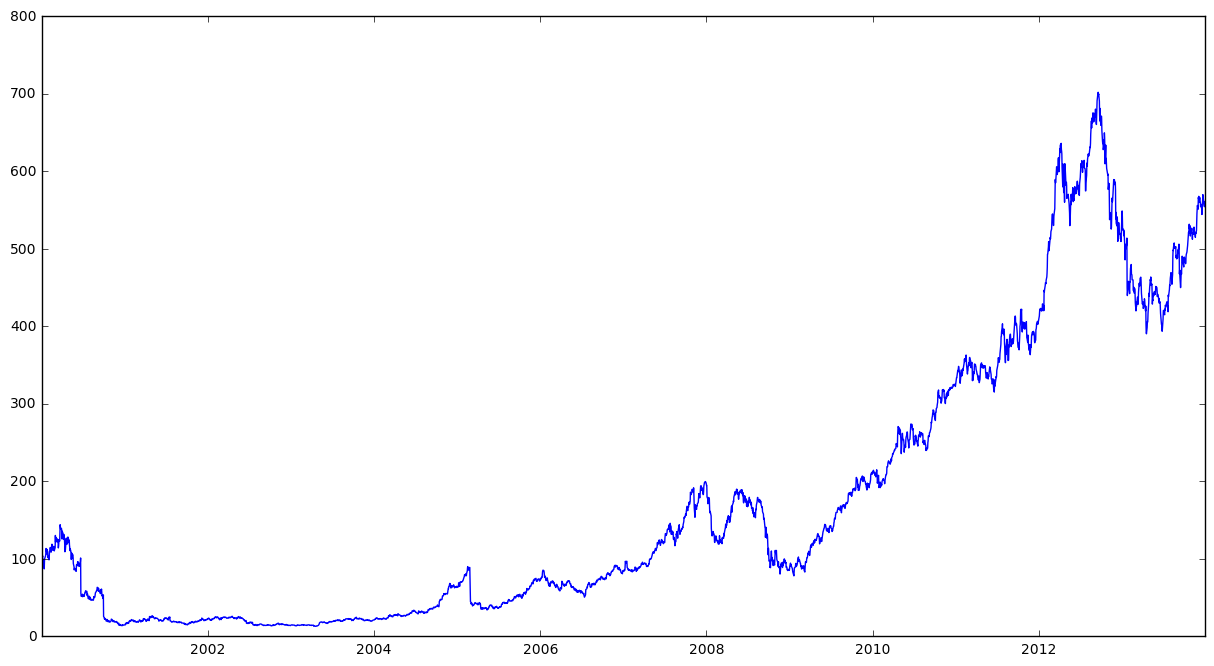

In [124]:
# СТРОИМ ГРАФИК ДИНАМИКИ АКЦИЙ КОМПАНИИ APPLE

apple = stocks[['AAPL']]
plt.plot(apple)
plt.rcParams['figure.figsize'] = 9, 2
plt.show()

In [125]:
# СОХРАНЯЕМ ДАННЫЕ ОБ АКЦИЯХ APPLE В ФАЙЛ, ПОСЛЕ ЧЕГО ЧИТАЕМ ИЗ НЕГО В ОБЪЕКТ Data Frame 

apple.to_csv('apple.csv')
apple_from_csv = pd.read_csv('apple.csv', parse_dates=True, index_col='Date')

In [126]:
# ПОЛУЧАЕМ ОБЩУЮ ИНФОРМАЦИЮ ПО ЭТОМУ НАБОРУ ДАННЫХ И ПЕЧАТАЕМ ПЕРВЫЕ 5 СТРОК

apple_from_csv.info()
print(apple_from_csv.head(5))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3521 entries, 2000-01-03 to 2013-12-31
Data columns (total 1 columns):
AAPL    3521 non-null float64
dtypes: float64(1)
memory usage: 55.0 KB
                  AAPL
Date                  
2000-01-03  111.937502
2000-01-04  102.500003
2000-01-05  103.999997
2000-01-06   94.999998
2000-01-07   99.500001


In [127]:
# НА ОСНОВЕ ИСХОДНОГО РЯДА ДИНАМИКИ СОЗДАЕМ ЧЕТЫРЕ ПРОИЗВОДНЫХ РЯДА ДИНАМИКИ С РАЗЛИЧНОЙ ДЛИТЕЛЬНОСТЬЮ
# ПЕРИОДОВ: НЕДЕЛЬНОЙ, МЕСЯЧНОЙ, КВАРТАЛЬНОЙ И ГОДОВОЙ (В ПОСЛЕДНЕМ СЛУЧАЕ - ЭТО ИСХОДНЫЙ РД)

apple_weeks = apple.resample('W').mean()
apple_months = apple.resample('M').mean()
apple_quaters = apple.resample('Q').mean()
apple_years = apple.resample('A').mean()

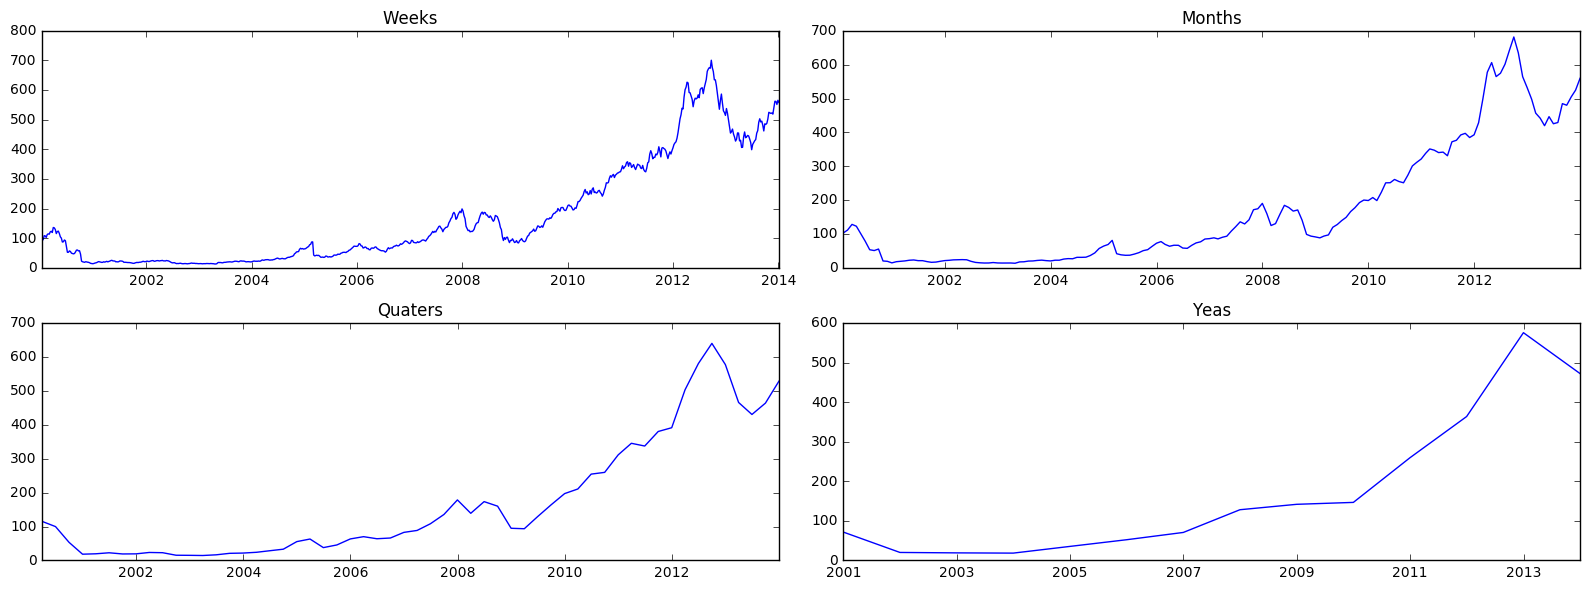

In [128]:
# СТРОИМ ГРАФИКИ ПОЛУЧЕННЫХ ВРЕМЕННЫХ РЯДОВ

plt.rcParams['figure.figsize'] = (16, 6)
plt.subplot(2,2,1)
plt.plot(apple_weeks)
plt.title('Weeks')
plt.subplot(2,2,2)
plt.plot(apple_months)
plt.title('Months')
plt.subplot(2,2,3)
plt.plot(apple_quaters)
plt.title('Quaters')
plt.subplot(2,2,4)
plt.plot(apple_years)
plt.title('Yeas')
plt.tight_layout()
plt.show()

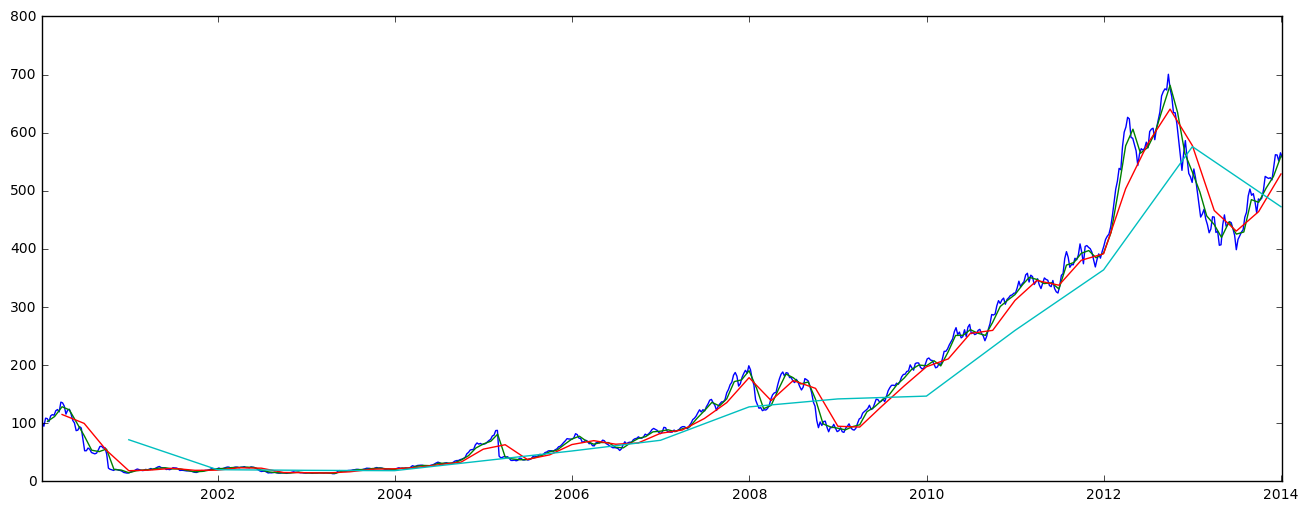

In [129]:
# СТРОИМ ВСЕ ОБРАЗЫ ВРЕМЕННЫХ РЯДОВ В ОДНОМ ПОЛЕ ГРАФИКА

plt.plot(apple_weeks)
plt.plot(apple_months)
plt.plot(apple_quaters)
plt.plot(apple_years)
plt.show()

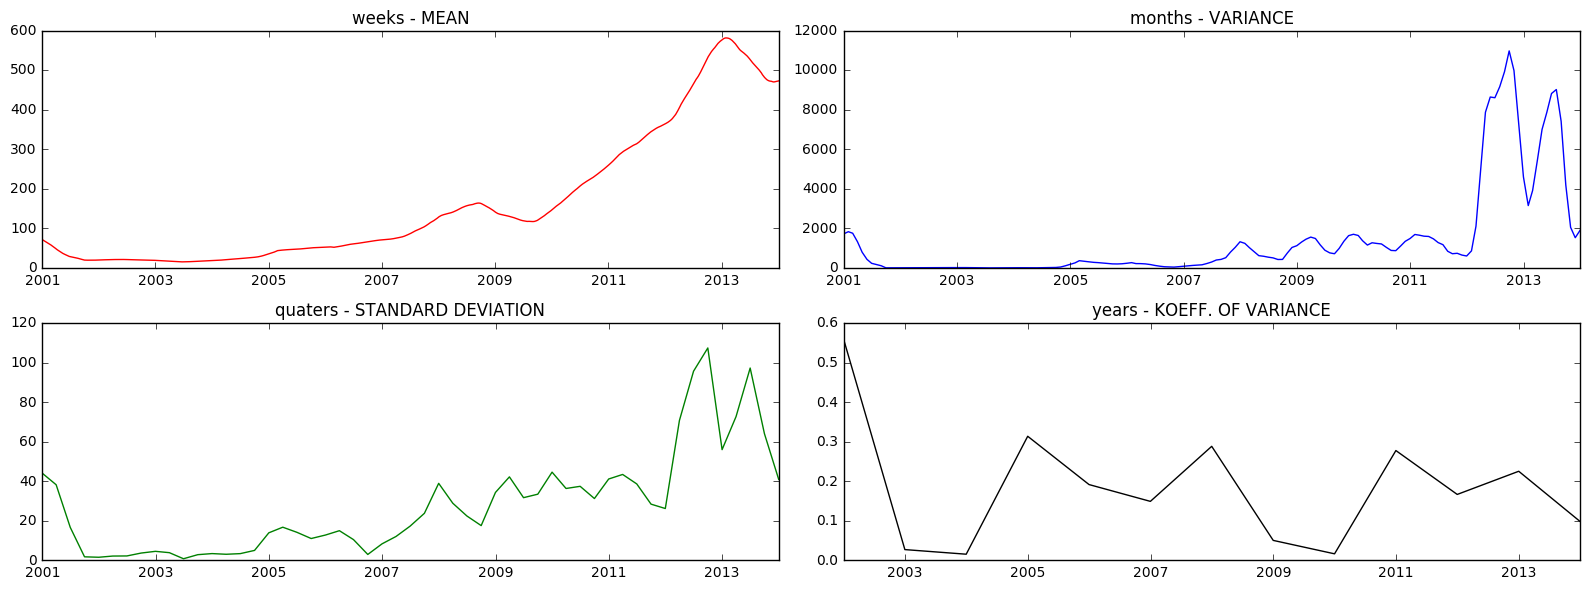

In [130]:
# СТРОИМ ДЛЯ КАЖДОГО РЯДА ДИНАМИКИ ГРАФИКИ СКОЛЬЗЯЩИХ СРЕДНИХ ИЗ РАЗЛИЧНЫХ СТАТИСТИЧЕСКИХ ПОКАЗАТЕЛЕЙ

plt.subplot(2,2,1)
rolling_weeks = apple_weeks.rolling(window=52).mean() # СРЕДНЯЯ АРИФМЕТИЧЕСКАЯ
plt.plot(rolling_weeks, color='red')
plt.title('weeks - MEAN')
plt.subplot(2,2,2)
rolling_months = apple_months.rolling(window=12).var() # ДИСПЕРСИЯ
plt.plot(rolling_months, color='blue')
plt.title('months - VARIANCE')
plt.subplot(2,2,3)
rolling_quaters = apple_quaters.rolling(window=4).std() # СТАНДАРТНОЕ ОТКЛОНЕНИЕ
plt.plot(rolling_quaters, color='green')
plt.title('quaters - STANDARD DEVIATION')
plt.subplot(2,2,4)
rolling_years = apple_years.rolling(window=2).apply(lambda x: x.std() / x.mean())
plt.plot(rolling_years, color='black')
plt.title('years - KOEFF. OF VARIANCE') # КОЭФФИЦИЕНТ ВАРИАЦИИ
plt.tight_layout()
plt.show()

In [131]:
# ВЫВОДИМ НА ЭКРАН ВРЕМЕННОЙ РЯД, ДЛЯ КОТОРОГО БУДЕМ РАССЧИТЫВАТЬ АНАЛИТИЧЕСКИЕ ПОКАЗАТЕЛИ ДИНАМИКИ

apple_years = apple.resample('A').mean()
ap = apple_years.rename(columns={'AAPL':'цена_Apple'})
print(ap)

            цена_Apple
Date                  
2000-12-31   71.749378
2001-12-31   20.219435
2002-12-31   19.139444
2003-12-31   18.544762
2004-12-31   35.526944
2005-12-31   52.401746
2006-12-31   70.810637
2007-12-31  128.273904
2008-12-31  141.979012
2009-12-31  146.814127
2010-12-31  259.842460
2011-12-31  364.004325
2012-12-31  576.049720
2013-12-31  472.634880


In [132]:
# ПИШЕМ ФУНКЦИЮ ДЛЯ РАСЧЕТА ЭТИХ ПОКАЗАТЕЛЕЙ

def dinamic_indicators(x):
    # ВЫЧИСЛЯЕМ БАЗИСНЫЙ АБСОЛЮТНЫЙ ПРИРОСТ
    delta_bas = [np.array(0),]
    for i in range(1, len(x)):
        delta_bas.append(x.values[i] - x.values[0])
    delta_bas_df = pd.DataFrame(delta_bas, columns=['Баз.абс.пр.'], index=x.index)
    # ВЫЧИСЛЯЕМ ЦЕПНОЙ АБСОЛЮТНЫЙ ПРИРОСТ
    delta_chain = [np.array(0),]
    for i in range(1, len(x)):
        delta_chain.append(x.values[i] - x.values[i-1])
    delta_chain_df = pd.DataFrame(delta_chain, columns=['Цеп.абс.пр.'], index=x.index)
    # ВЫЧИСЛЯЕМ БАЗИСНЫЙ КОЭФФИЦИЕНТ РОСТА
    index_bas = [np.array(0),]
    for i in range(1, len(x)):
        index_bas.append(x.values[i] / x.values[0])
    index_bas_df = pd.DataFrame(index_bas, columns=['Баз.коэф.р.'], index=x.index)
    # ВЫЧИСЛЯЕМ ЦЕПНОЙ КОЭФФИЦИЕНТ РОСТА
    index_chain = [np.array(0),]
    for i in range(1, len(x)):
        index_chain.append(x.values[i] - x.values[i-1])
    index_chain_df = pd.DataFrame(index_chain, columns=['Цеп.коэф.р.'], index=x.index)
    # ВЫЧИСЛЯЕМ АБСОЛЮТНОЕ ЗНАЧЕНИЕ ОДНОГО ПРОЦЕНТА ПРИРОСТА (ЦЕПНАЯ СХЕМА)
    delta_index = [np.array(0),]
    for i in range(1, len(x)):
        delta_index.append(x.values[i-1]*0.01)
    delta_index_df = pd.DataFrame(delta_index, columns=['Абсолютное значение 1-го процента \
    прироста, цеп.'], index=x.index)
    all_together = pd.concat([x, delta_bas_df, delta_chain_df, index_bas_df, 
                          index_chain_df, delta_index_df], axis=1)
    print(all_together)

In [133]:
# АНАЛИТИЧЕСКИЕ ПОКАЗАТЕЛЯ РЯДА ДИНАМИКИ ЦЕН НА АКЦИИ КОМПАНИИ APPLE ЗА 2000-2014 ГГ.

dinamic_indicators(ap)

            цена_Apple  Баз.абс.пр.  Цеп.абс.пр.  Баз.коэф.р.  Цеп.коэф.р.  \
Date                                                                         
2000-12-31   71.749378     0.000000     0.000000     0.000000     0.000000   
2001-12-31   20.219435   -51.529943   -51.529943     0.281806   -51.529943   
2002-12-31   19.139444   -52.609934    -1.079991     0.266754    -1.079991   
2003-12-31   18.544762   -53.204616    -0.594682     0.258466    -0.594682   
2004-12-31   35.526944   -36.222434    16.982182     0.495153    16.982182   
2005-12-31   52.401746   -19.347632    16.874802     0.730344    16.874802   
2006-12-31   70.810637    -0.938741    18.408891     0.986916    18.408891   
2007-12-31  128.273904    56.524526    57.463267     1.787805    57.463267   
2008-12-31  141.979012    70.229634    13.705107     1.978819    13.705107   
2009-12-31  146.814127    75.064749     4.835115     2.046208     4.835115   
2010-12-31  259.842460   188.093082   113.028333     3.621529   

### Переходим к ***matplotlib*** 